![alttext](https://github.com/UrbsLab/STREAMLINE/blob/main/Pictures/STREAMLINE_LOGO.jpg?raw=true)

STREAMLINE is an end-to-end automated machine learning (AutoML) pipeline that empowers anyone to easily run, interpret, and apply a rigorous and customizable analysis for data mining or predictive modeling.

--------------

This notebook runs all aspects of the STREAMLINE which is an automated machine learning analysis pipeline for binary classification tasks. Of note, two potentially important elements that are not automated by this pipeline include careful data cleaning and feature engineering using problem domain knowledge. Please review the README included in the associated GitHub repository for a detailed about this pipeline.

This notebook is set up to run 'as-is' on a 'demo' dataset from the UCI repository (HCC dataset) using only three modeling algorithms (so that it runs in a matter of minutes). We analyze a copy of the dataset with and without covariate features to show how this pipline can be run on multiple datasets simultaneously (having the option to compare modeling on these different datasets in a later phase of the pipeline. Users will need to upload their own files and update pipeline run parameters below to ready the pipeline for their own needs. Suggested default run parameters suitible for most users are included, however file paths and names will need to be edited to run anything other than the 'demo' analysis.



# Setup

## Prerequisites and STREAMLINE
Setting up prerequisites and STREAMLINE

In [ ]:
!git clone -b dev https://github.com/UrbsLab/STREAMLINE.git -q
%cd STREAMLINE
!pip install -r requirements.txt &> /dev/null

/content/STREAMLINE


In [ ]:
!pip install --upgrade scipy>=1.8.0

## Notebook Housekeeping
Set up notebook cells to display internal process. 

Use logging.INFO for higher level output, logging.WARNING for only critical information. Comment to hide all text output.

You can use run_parallel=True for phases other than modeling, but the advantage is not significant vs the overhead for small jobs.

In [ ]:
import logging
FORMAT = '%(levelname)s: %(message)s'
logging.basicConfig(format=FORMAT)
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# STREAMLINE Workflow

## Mandatory Run Parameters for Pipeline

Preset for running the demonstration dataset, change accordingly for running on custom dataset.

In [ ]:
# Target dataset folder path(must include one or more .txt or .csv datasets)
data_path = "./DemoData" # (str) Demontration Data Path Folder

# Output foder path: where to save pipeline outputs (must be updated for a given user)
output_path = './demo/' # (str) Demonstration Ouput Path Folder

# Unique experiment name - folder created for this analysis within output folder path
experiment_name = 'hcc_demo'  # (str) Demontration Experiment Name

# Data Labels
class_label = 'Class' # (str) i.e. class outcome column label
instance_label = 'InstanceID' # (str) If data includes instance labels, given respective column name here, otherwise put 'None'

# Option to manually specify feature names to leave out of analysis, or which to treat as categorical (without using built in variable type detector)
ignore_features = None # list of column names (given as string values) to exclude from the analysis (only insert column names if needed, otherwise leave empty)
categorical_feature_headers = None # empty list for 'auto-detect' otherwise list feature names (given as string values) to be treated as categorical. Only impacts algorithms that can take variable type into account.

Housekeeping code for error reduction and functionality.

In [ ]:
import os
import shutil
if os.path.exists(output_path):
    shutil.rmtree(output_path)

Uncomment and run the below cell to easily upload csv files and set up custom dataset:

In [ ]:
# !mkdir -p mycustomfolder
# %cd mycustomfolder
# CUSTOM = True
# from google.colab import files
# uploaded = files.upload()
# %cd ..
# class_label = input("Enter Class Label Header")
# instance_label = eval(input("Enter Instance Label Header or None"))

## Phase 1: Exploratory Analysis

In [ ]:
n_splits = 3  # (int, > 1) Number of training/testing data partitions to create - and resulting number of models generated using each ML algorithm
partition_method = 'Stratified' # (str) for Stratified, Random, or Group, respectively
match_label = None # (str or None) Only applies when M selected for partition-method; indicates column label with matched instance ids' 
categorical_cutoff = 10 # (int) Bumber of unique values after which a variable is considered to be quantitative vs categorical
sig_cutoff = 0.05 # (float, 0-1) Significance cutoff used throughout pipeline
# list of names of analysis to do while doing EDA
exploration_list = ["Describe", "Differentiate", "Univariate Analysis"]
# list of analysis plots to save in experiment directory
plot_list = ["Describe", "Univariate Analysis", "Feature Correlation"]
# feature correlation analysis (yields correlation heatmap)
# univariate analysis plots (note: univariate analysis still output by default)
top_features = 20 # (int) Number of top features to report in notebook for univariate analysis
random_state = 42 # (int) Sets a specific random seed for reproducible results

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:root:Loading Dataset: hcc-data_example_no_covariates
INFO:root:Loading Dataset: hcc-data_example_no_covariates
INFO:root:Identifying Feature Types...
INFO:root:Running Basic Exploratory Analysis...
INFO:root:Data Counts: ----------------
INFO:root:Instance Count = 165
INFO:root:Feature Count = 47
INFO:root:    Categorical  = 26
INFO:root:    Quantitative = 21
INFO:root:Missing Count = 826
INFO:root:    Missing Percent = 0.10651192778852353
INFO:root:Class Counts: ----------------
INFO:root:Class Count Information0    102
1     63
Name: Class, dtype: int64


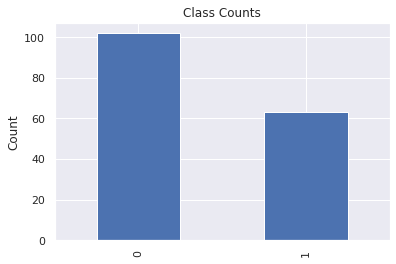

INFO:root:Generating Feature Correlation Heatmap...


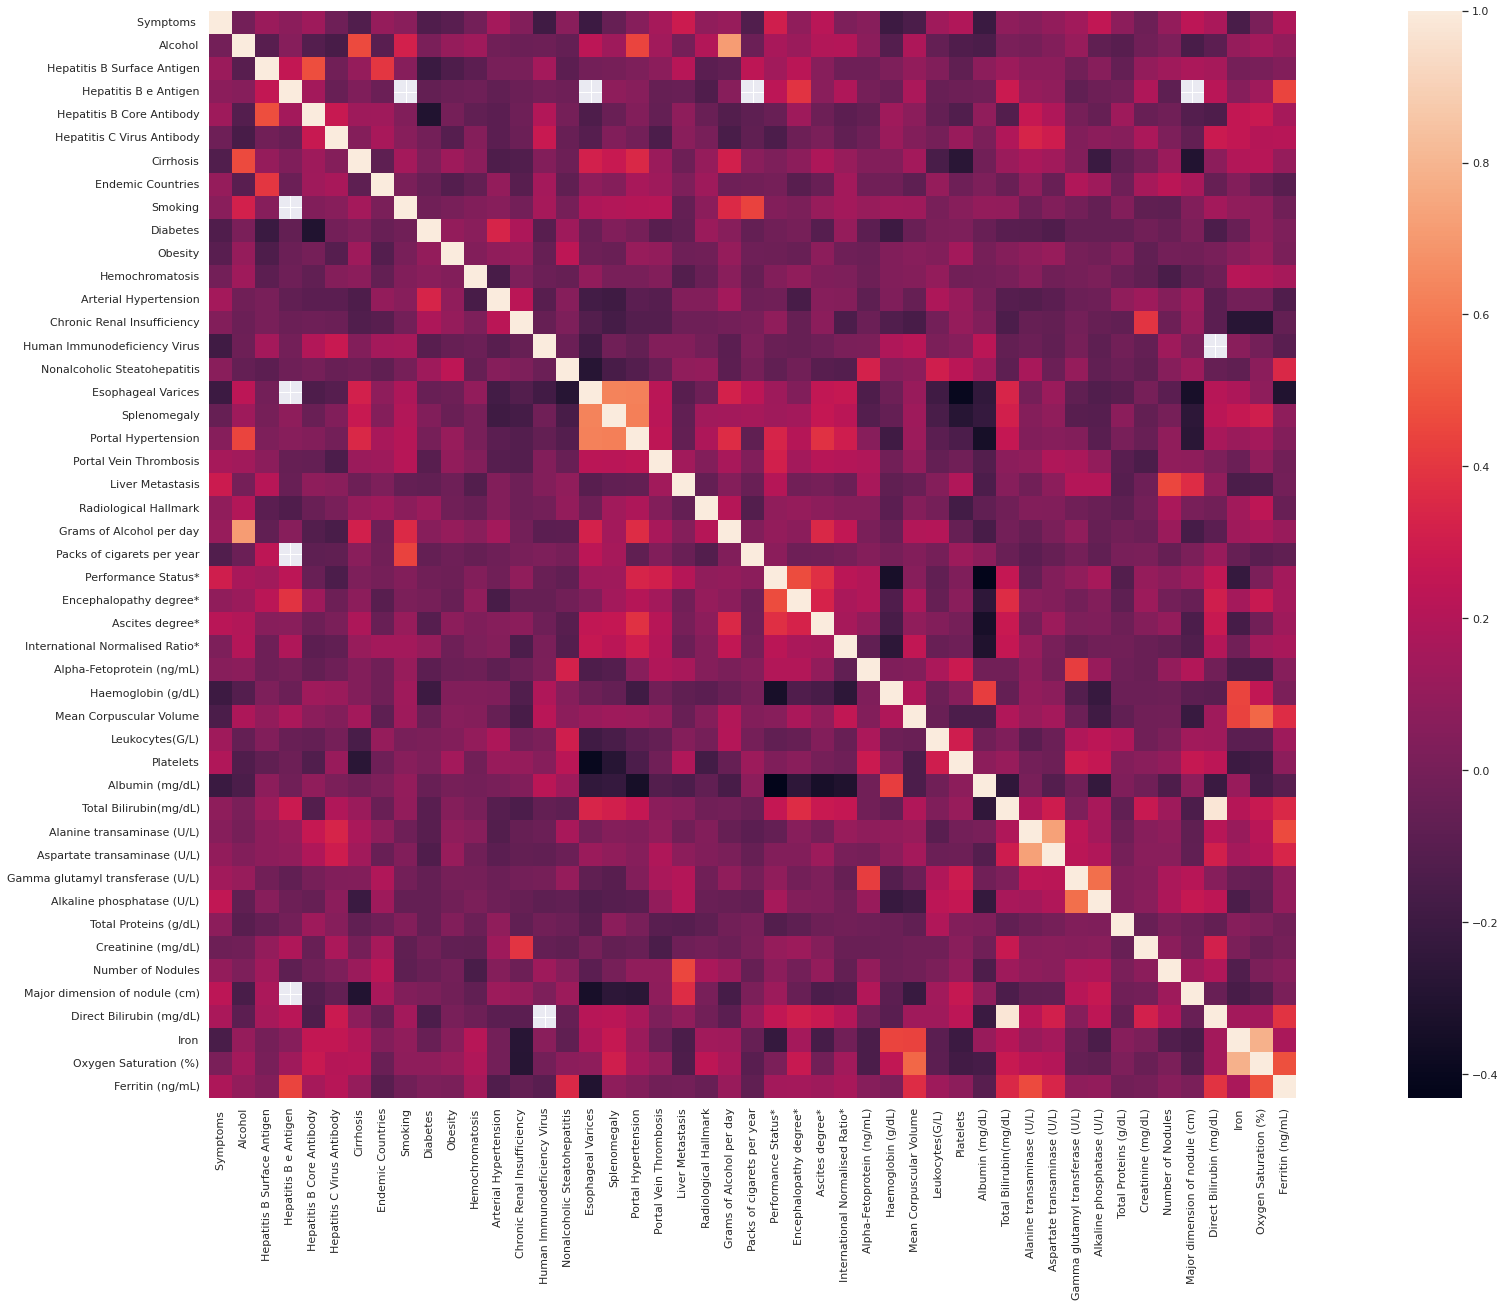

INFO:root:Running Univariate Analyses...
INFO:root:Plotting top significant 20 features.
INFO:root:###################################################
INFO:root:Significant Univariate Associations:
INFO:root:Performance Status*: (p-val = 3.2548676278782114e-05)
INFO:root:Symptoms : (p-val = 0.0006092985105592953)
INFO:root:Liver Metastasis: (p-val = 0.002993588224869906)
INFO:root:Ascites degree*: (p-val = 0.0038134308539161175)
INFO:root:Portal Vein Thrombosis: (p-val = 0.01174304115542567)
INFO:root:Encephalopathy degree*: (p-val = 0.03673986822541975)
INFO:root:Diabetes: (p-val = 0.20717818281920294)
INFO:root:Hepatitis C Virus Antibody: (p-val = 0.2152844001545551)
INFO:root:Endemic Countries: (p-val = 0.3741454960813042)
INFO:root:Chronic Renal Insufficiency: (p-val = 0.3855402814015594)
INFO:root:Arterial Hypertension: (p-val = 0.4846830135726744)
INFO:root:Smoking: (p-val = 0.4866012581237731)
INFO:root:Number of Nodules: (p-val = 0.6283074065800799)
INFO:root:Hepatitis B Core A

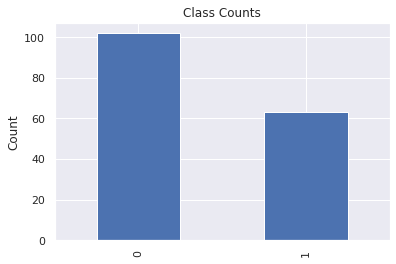

INFO:root:Generating Feature Correlation Heatmap...


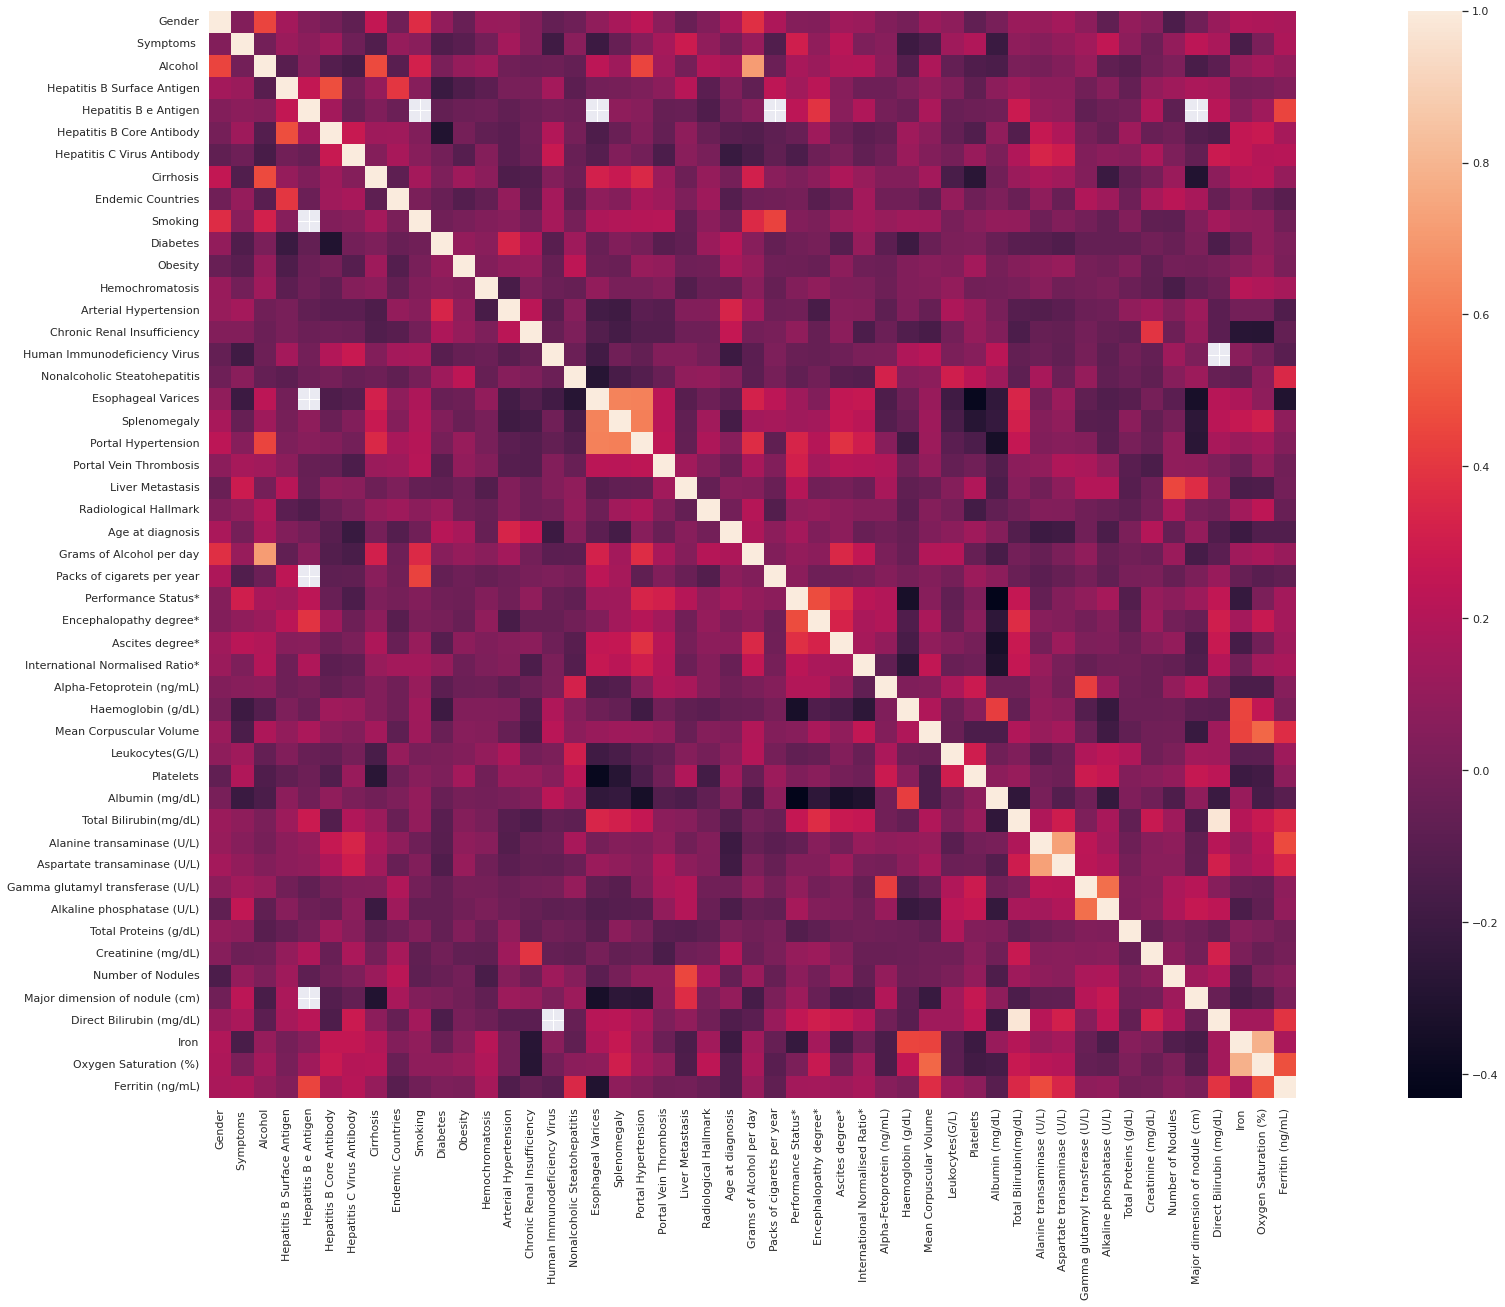

INFO:root:Running Univariate Analyses...
INFO:root:Plotting top significant 20 features.
INFO:root:###################################################
INFO:root:Significant Univariate Associations:
INFO:root:Performance Status*: (p-val = 3.2548676278782114e-05)
INFO:root:Symptoms : (p-val = 0.0006092985105592953)
INFO:root:Liver Metastasis: (p-val = 0.002993588224869906)
INFO:root:Ascites degree*: (p-val = 0.0038134308539161175)
INFO:root:Portal Vein Thrombosis: (p-val = 0.01174304115542567)
INFO:root:Age at diagnosis: (p-val = 0.03568323751208702)
INFO:root:Encephalopathy degree*: (p-val = 0.03673986822541975)
INFO:root:Diabetes: (p-val = 0.20717818281920294)
INFO:root:Hepatitis C Virus Antibody: (p-val = 0.2152844001545551)
INFO:root:Endemic Countries: (p-val = 0.3741454960813042)
INFO:root:Chronic Renal Insufficiency: (p-val = 0.3855402814015594)
INFO:root:Arterial Hypertension: (p-val = 0.4846830135726744)
INFO:root:Smoking: (p-val = 0.4866012581237731)
INFO:root:Number of Nodules:

In [ ]:
from streamline.runners.eda_runner import EDARunner
eda = EDARunner(data_path, output_path, experiment_name, 
                exploration_list=exploration_list, plot_list=plot_list,
                class_label=class_label, instance_label=instance_label, 
                match_label=match_label, n_splits=n_splits, 
                partition_method=partition_method,
                ignore_features=ignore_features, 
                categorical_features=categorical_feature_headers, 
                top_features=top_features,
                categorical_cutoff=categorical_cutoff, sig_cutoff=sig_cutoff,
                random_state=random_state, show_plots=True)
eda.run(run_parallel=False)

## Phase 2: Data Preprocessing

In [ ]:
scale_data = True # (bool, True or False) Perform data scaling?
impute_data = True # (bool, True or False) Perform missing value data imputation? (required for most ML algorithms if missing data is present)
overwrite_cv = True # (bool, True or False) Overwrites earlier cv datasets with new scaled/imputed ones
multi_impute = True # (bool, True or False) Applies multivariate imputation to quantitative features, otherwise uses mean imputation

In [ ]:
from streamline.runners.dataprocess_runner import DataProcessRunner
dpr = DataProcessRunner(output_path, experiment_name, 
                        scale_data=scale_data, impute_data=impute_data,
                        multi_impute=multi_impute, overwrite_cv=overwrite_cv, 
                        class_label=class_label, instance_label=instance_label, 
                        random_state=random_state)
dpr.run(run_parallel=False)

INFO:root:Preparing Train and Test for: hcc-data_example_no_covariates_CV_2
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example_no_covariates Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_example_no_covariates_CV_1
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example_no_covariates Phase 2 complete
INFO:root:Preparing Train and Test for: hcc-data_example_no_covariates_CV_0
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:hcc-data_example_no_covariates Phase 2 complete
INFO:root:Preparing Train and Test for: demodata_CV_2
INFO:root:Imputing Missing Values...
INFO:root:Scaling Data Values...
INFO:root:Saving Processed Train and Test Data...
INFO:root:demodata Phase 2 complete
INFO:root:Preparing Train an

## Phase 3: Feature Importance Evaluation

In [ ]:
do_mutual_info = True # (bool, True or False) Do mutual information analysis
do_multisurf = True # (bool, True or False) Do multiSURF analysis
feat_algorithms = []
if do_mutual_info:
    feat_algorithms.append("MI")
if do_multisurf:
    feat_algorithms.append("MS")
use_TURF = False # (bool, True or False) Use TURF wrapper around MultiSURF
TURF_pct = 0.5 # (float, 0.01-0.5) Proportion of instances removed in an iteration (also dictates number of iterations)
njobs = -1 # (int) Number of cores dedicated to running algorithm; setting to -1 will use all available cores
instance_subset = 2000 # (int) Sample subset size to use with multiSURF

In [ ]:
from streamline.runners.feature_runner import FeatureImportanceRunner
f_imp = FeatureImportanceRunner(output_path, experiment_name, 
                                class_label=class_label, 
                                instance_label=instance_label,
                                instance_subset=instance_subset, 
                                algorithms=feat_algorithms, 
                                use_turf=use_TURF, turf_pct=TURF_pct, 
                                random_state=random_state)
f_imp.run(run_parallel=False)

INFO:root:Loading Dataset: hcc-data_example_no_covariates_CV_2_Train
INFO:root:Prepared Train and Test for: hcc-data_example_no_covariates_CV_2
INFO:root:Running Mutual Information...
INFO:root:Sort and pickle feature importance scores...
INFO:root:hcc-data_example_no_covariates CV2 phase 3 mutual_information evaluation complete
INFO:root:Loading Dataset: hcc-data_example_no_covariates_CV_1_Train
INFO:root:Prepared Train and Test for: hcc-data_example_no_covariates_CV_1
INFO:root:Running Mutual Information...
INFO:root:Sort and pickle feature importance scores...
INFO:root:hcc-data_example_no_covariates CV1 phase 3 mutual_information evaluation complete
INFO:root:Loading Dataset: hcc-data_example_no_covariates_CV_0_Train
INFO:root:Prepared Train and Test for: hcc-data_example_no_covariates_CV_0
INFO:root:Running Mutual Information...
INFO:root:Sort and pickle feature importance scores...
INFO:root:hcc-data_example_no_covariates CV0 phase 3 mutual_information evaluation complete
INFO:ro

## Phase 4: Feature Selection

In [ ]:
max_features_to_keep = 2000 # (int) Maximum features to keep. 'None' if no max
filter_poor_features = True # (bool, True or False) Filter out the worst performing features prior to modeling
top_features = 40 # (int) Number of top features to illustrate in figures
export_scores = True # (bool, True or False) Export figure summarizing average feature importance scores over cv partitions

INFO:root:Plotting Feature Importance Scores...
INFO:root:                           Feature  Importance
28       Alpha-Fetoprotein (ng/mL)    0.123251
24             Performance Status*    0.098954
44                            Iron    0.084515
38      Alkaline phosphatase (U/L)    0.076429
33                 Albumin (mg/dL)    0.074789
46                Ferritin (ng/mL)    0.069531
29              Haemoglobin (g/dL)    0.067689
42  Major dimension of nodule (cm)    0.061938
11                 Hemochromatosis    0.035557
5       Hepatitis C Virus Antibody    0.033404
INFO:root:Saved Feature Importance Plots at
INFO:root:./demo//hcc_demo/hcc-data_example_no_covariates/feature_selection/mutual_information/TopAverageScores.png


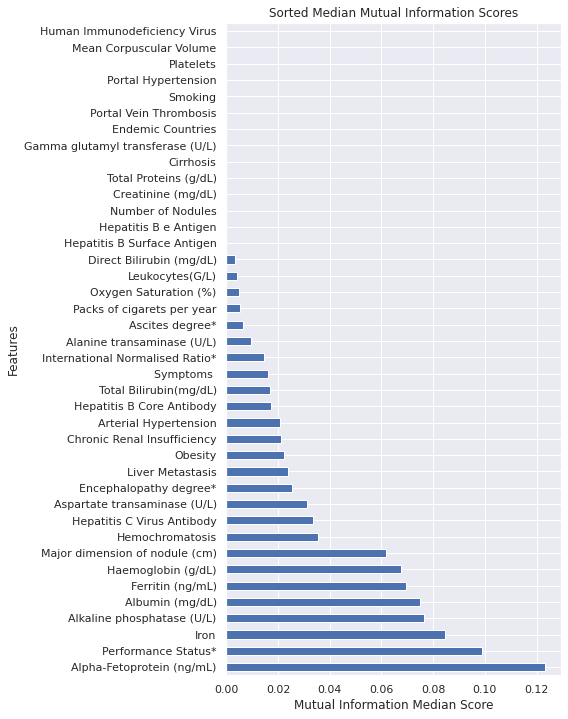

INFO:root:                             Feature  Importance
38        Alkaline phosphatase (U/L)    0.099398
29                Haemoglobin (g/dL)    0.095180
24               Performance Status*    0.077934
20                  Liver Metastasis    0.073571
37  Gamma glutamyl transferase (U/L)    0.052361
26                   Ascites degree*    0.050402
45             Oxygen Saturation (%)    0.049362
44                              Iron    0.039162
42    Major dimension of nodule (cm)    0.038157
33                   Albumin (mg/dL)    0.037682
INFO:root:Saved Feature Importance Plots at
INFO:root:./demo//hcc_demo/hcc-data_example_no_covariates/feature_selection/multisurf/TopAverageScores.png


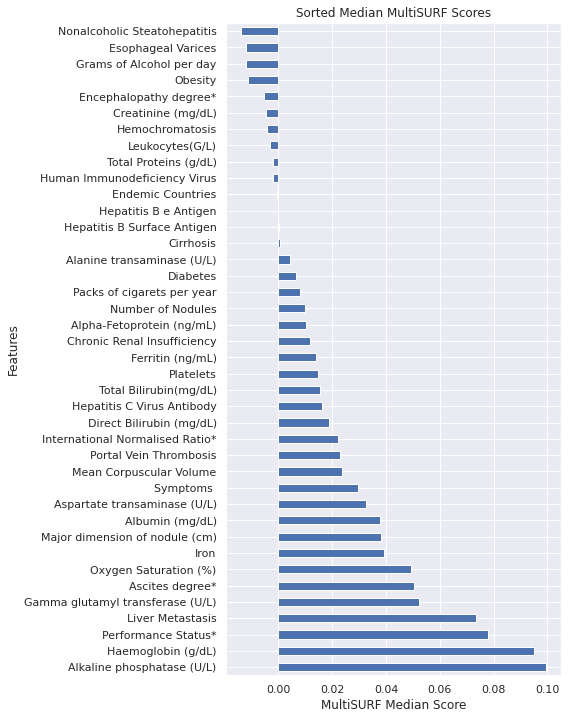

INFO:root:Applying collective feature selection...
INFO:root:hcc-data_example_no_covariates Phase 4 Complete
INFO:root:Plotting Feature Importance Scores...
INFO:root:                           Feature  Importance
30       Alpha-Fetoprotein (ng/mL)    0.122169
26             Performance Status*    0.121332
40      Alkaline phosphatase (U/L)    0.084168
1                        Symptoms     0.077926
48                Ferritin (ng/mL)    0.069531
44  Major dimension of nodule (cm)    0.068034
31              Haemoglobin (g/dL)    0.060757
23                Age at diagnosis    0.058108
46                            Iron    0.044671
20          Portal Vein Thrombosis    0.039500
INFO:root:Saved Feature Importance Plots at
INFO:root:./demo//hcc_demo/demodata/feature_selection/mutual_information/TopAverageScores.png


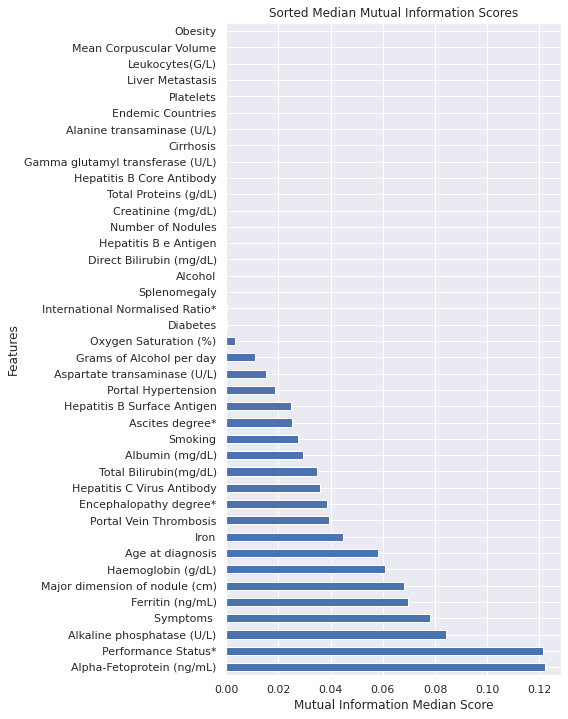

INFO:root:                             Feature  Importance
31                Haemoglobin (g/dL)    0.105463
40        Alkaline phosphatase (U/L)    0.095252
26               Performance Status*    0.080730
47             Oxygen Saturation (%)    0.061901
28                   Ascites degree*    0.059802
21                  Liver Metastasis    0.058100
46                              Iron    0.056762
39  Gamma glutamyl transferase (U/L)    0.041177
1                          Symptoms     0.033399
35                   Albumin (mg/dL)    0.029607
INFO:root:Saved Feature Importance Plots at
INFO:root:./demo//hcc_demo/demodata/feature_selection/multisurf/TopAverageScores.png


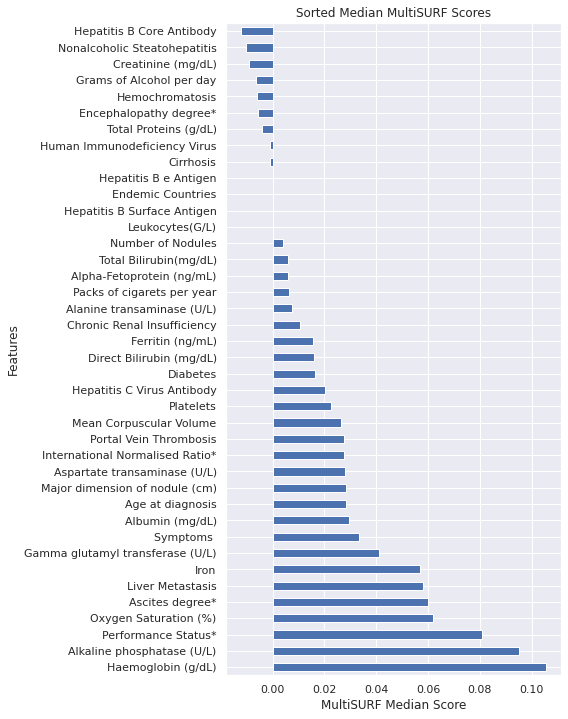

INFO:root:Applying collective feature selection...
INFO:root:demodata Phase 4 Complete


In [ ]:
from streamline.runners.feature_runner import FeatureSelectionRunner
f_sel = FeatureSelectionRunner(output_path, experiment_name, 
                               feat_algorithms, class_label=class_label, 
                               instance_label=instance_label,
                               max_features_to_keep=max_features_to_keep, 
                               filter_poor_features=filter_poor_features, 
                               top_features=top_features, 
                               export_scores=export_scores,
                               overwrite_cv=overwrite_cv, 
                               random_state=random_state,
                               show_plots=True)
f_sel.run(run_parallel=False)

## Phase 5: Modeling

In [ ]:
# Machine Learning Algorithms to Run, can be change by the user.
algorithms = ["NB", "LR", "DT"]
# ML Model Algorithm to exclude
exclude = ['eLCS', 'XCS', 'ExSTraCS']

# Other Analysis Parameters
training_subsample = 0  # (int) For long running algorithms, option to subsample training set (0 for no subsample) Limit Sample Size Used to train algorithms that do not scale up well in large instance spaces (i.e. XGB,SVM,KN,ANN,and LR to a lesser degree) and depending on 'instances' settings, ExSTraCS, eLCS, and XCS)
use_uniform_FI = True # (bool, True or False) Overides use of any available feature importances estimate methods from models, instead using permutation_importance uniformly
primary_metric = 'balanced_accuracy' # (str) Must be an available metric identifier from (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
metric_direction = 'maximize' # (str, either of 'maximize' or 'minimize')

# Hyperparameter Sweep Options
n_trials = 200   # (int or None) Number of bayesian hyperparameter optimization trials using optuna
timeout = 900    # (int or None) Seconds until hyperparameter sweep stops running new trials (Note: it may run longer to finish last trial started)
export_hyper_sweep_plots = True # (bool, True or False) Export hyper parameter sweep plots from optuna

# Learning classifier system specific options (ExSTraCS, eLCS, XCS)
do_lcs_sweep = False # (bool, True or False) Do LCS hyperparam tuning or use below params
lcs_nu = 1                 # (int, 0-10) Fixed LCS nu param
lcs_iterations = 200000    # (int, > data sample size) Fixed LCS # learning iterations param
lcs_N = 2000               # (int) > 500) Fixed LCS rule population maximum size param
lcs_timeout = 1200     # (int) Seconds until hyperparameter sweep stops for LCS algorithms (evolutionary algorithms often require more time for a single run)


In [ ]:
from streamline.runners.model_runner import ModelExperimentRunner
model_exp = ModelExperimentRunner(
                output_path, experiment_name, algorithms=algorithms, 
                exclude=exclude, class_label=class_label,
                instance_label=instance_label, scoring_metric=primary_metric, 
                metric_direction=metric_direction,
                training_subsample=training_subsample, 
                use_uniform_fi=use_uniform_FI, n_trials=n_trials,
                timeout=timeout, save_plots=False, 
                do_lcs_sweep=do_lcs_sweep, lcs_nu=lcs_nu, lcs_n=lcs_N, 
                lcs_iterations=lcs_iterations,
                lcs_timeout=lcs_timeout, resubmit=False)
model_exp.run(run_parallel=True)

100%|██████████| 18/18 [01:04<00:00,  3.57s/it]


## Phase 5 (Optional/Advanced): Feeding Custom Models

In [ ]:
#@title Custom Model Example

from abc import ABC
from streamline.modeling.basemodel import BaseModel
from sklearn.linear_model import SGDClassifier as SGD


class ElasticNetClassifier(BaseModel, ABC):
    model_name = "Elastic Net"
    small_name = "EN"
    color = "aquamarine"

    def __init__(self, cv_folds=3, scoring_metric='balanced_accuracy',
                 metric_direction='maximize', random_state=None, cv=None, n_jobs=None):
        super().__init__(SGD, "Elastic Net", cv_folds, scoring_metric, metric_direction, random_state, cv)
        self.param_grid = {'penalty': ['elasticnet'], 'loss': ['log_loss', 'modified_huber'], 'alpha': [0.04, 0.05],
                           'max_iter': [1000, 2000], 'l1_ratio': [0.001, 0.1], 'class_weight': [None, 'balanced'],
                           'random_state': [random_state, ]}
        self.small_name = "EN"
        self.color = "aquamarine"
        self.n_jobs = n_jobs

    def objective(self, trial, params=None):
        self.params = {'penalty': trial.suggest_categorical('penalty', self.param_grid['penalty']),
                       'loss': trial.suggest_categorical('loss', self.param_grid['loss']),
                       'alpha': trial.suggest_float('alpha', self.param_grid['alpha'][0],
                                                    self.param_grid['l1_ratio'][1]),
                       'max_iter': trial.suggest_int('max_iter', self.param_grid['max_iter'][0],
                                                     self.param_grid['max_iter'][1]),
                       'l1_ratio': trial.suggest_float('l1_ratio', self.param_grid['l1_ratio'][0],
                                                       self.param_grid['l1_ratio'][1]),
                       'class_weight': trial.suggest_categorical('class_weight', self.param_grid['class_weight']),
                       'random_state': trial.suggest_categorical('random_state', self.param_grid['random_state'])}

        mean_cv_score = self.hyper_eval()
        return mean_cv_score

In [ ]:
import time
import optuna
from streamline.modeling.modeljob import ModelJob
from streamline.models.decision_tree import DecisionTreeClassifier

model = ElasticNetClassifier()
start = time.time()
n_splits = 3

logging.warning("Running " + model.small_name + " Model Optimization")

optuna.logging.set_verbosity(optuna.logging.WARNING)
for i in range(n_splits):
    model_job = ModelJob(output_path + '/' + experiment_name + '/demodata', output_path, experiment_name, i,
                         class_label=class_label, instance_label=instance_label)
    model_job.run(model)
    logging.warning("Best Params:" + str(model.params))
logging.warning(model.small_name + " Optimization Step, Time running" + "" + ": " + str(time.time() - start))

INFO:root:Running EN on ./demo//hcc_demo/demodata/CVDatasets/demodata_CV_0_Train.csv
INFO:root:Best trial:
INFO:root:  Value: 0.7912667043101825
INFO:root:  Params: 
INFO:root:    penalty: elasticnet
INFO:root:    loss: log_loss
INFO:root:    alpha: 0.07468171939362755
INFO:root:    max_iter: 1260
INFO:root:    l1_ratio: 0.07452463456724255
INFO:root:    class_weight: None
INFO:root:    random_state: None
INFO:root:demodata [CV_0] (EN) training complete. ------------------------------------
INFO:root:Running EN on ./demo//hcc_demo/demodata/CVDatasets/demodata_CV_1_Train.csv
INFO:root:Best trial:
INFO:root:  Value: 0.8059947299077734
INFO:root:  Params: 
INFO:root:    penalty: elasticnet
INFO:root:    loss: modified_huber
INFO:root:    alpha: 0.09235397165172314
INFO:root:    max_iter: 1466
INFO:root:    l1_ratio: 0.08734659890349529
INFO:root:    class_weight: balanced
INFO:root:    random_state: None
INFO:root:demodata [CV_1] (EN) training complete. -----------------------------------

## Phase 6: Statistics Summary and Figure Generation

In [ ]:
plot_ROC = True    # (bool, True or False) Plot ROC curves individually for each algorithm including all CV results and averages
plot_PRC = True    # (bool, True or False) Plot PRC curves individually for each algorithm including all CV results and averages
plot_FI_box = True # (bool, True or False) Plot box plot summaries comparing algorithms for each metric
plot_metric_boxplots = True # (bool, True or False) Plot feature importance boxplots for each algorithm
metric_weight = 'balanced_accuracy' # (str, balanced_accuracy or roc_auc) ML model metric used as weight in composite FI plots (only supports balanced_accuracy or roc_auc as options) Recommend setting the same as primary_metric if possible.
top_model_features = 40  # (int) Number of top features in model to illustrate in figures

INFO:root:Running Statistics Summary for hcc-data_example_no_covariates
INFO:root:Running stats on Naive Bayes


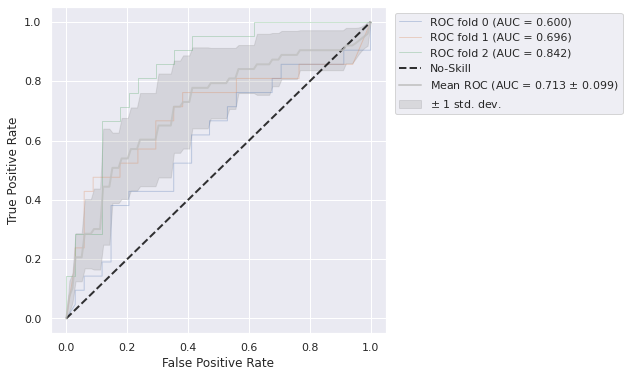

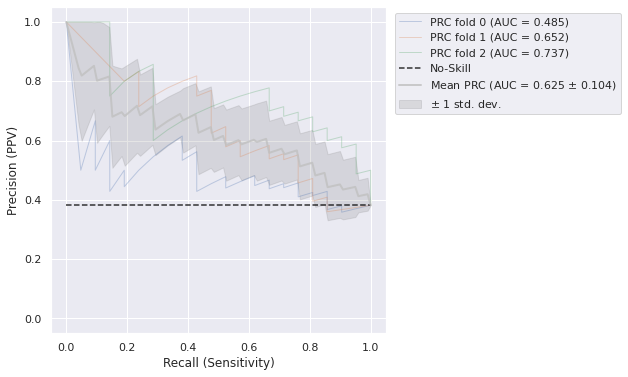

INFO:root:Running stats on Logistic Regression


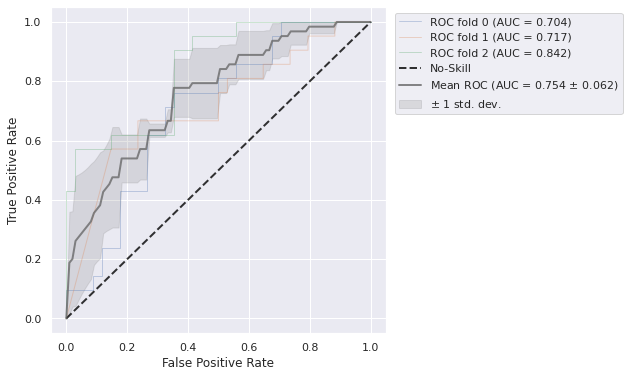

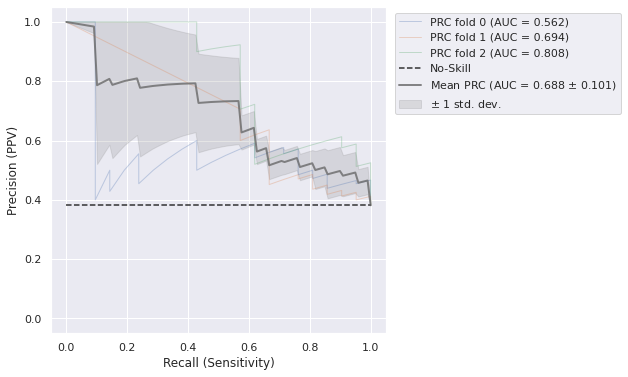

INFO:root:Running stats on Decision Tree


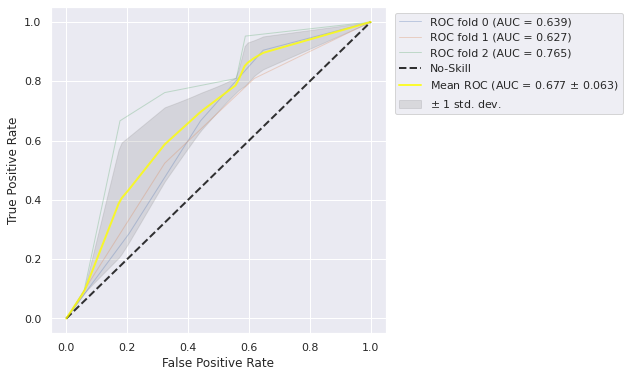

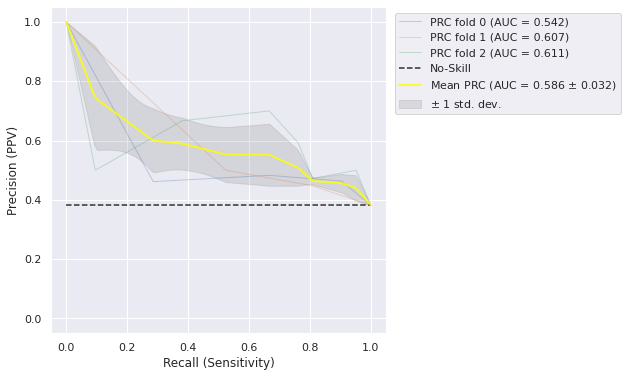

INFO:root:Generating ROC and PRC plots...


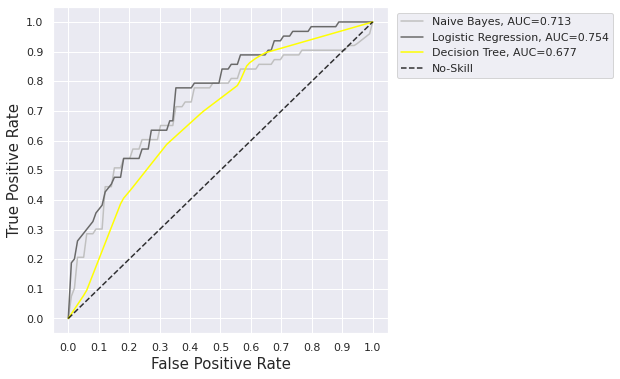

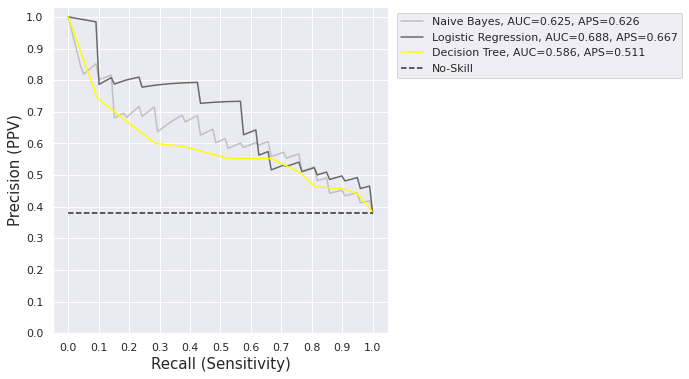

INFO:root:Saving Metric Summaries...
INFO:root:Generating Metric Boxplots...


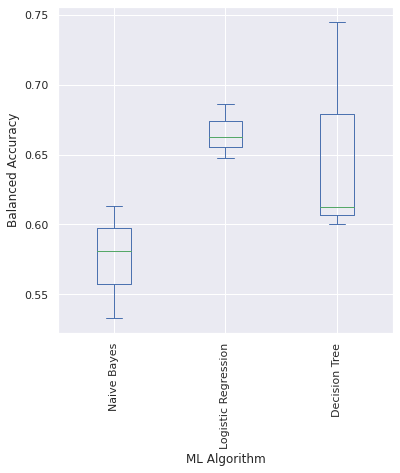

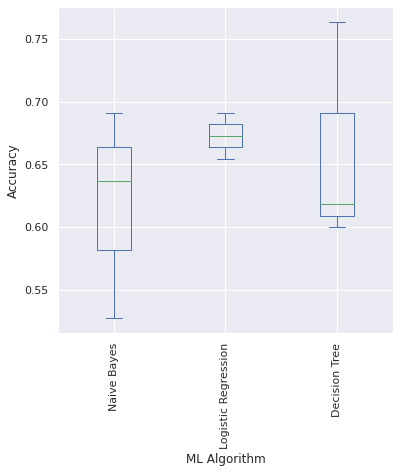

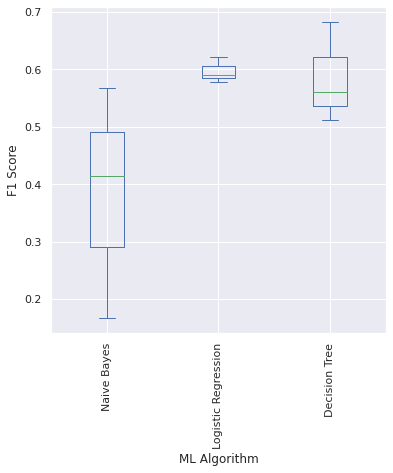

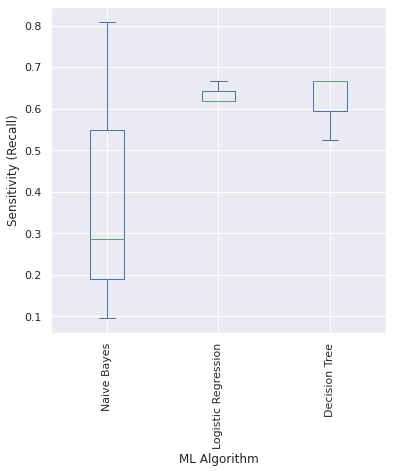

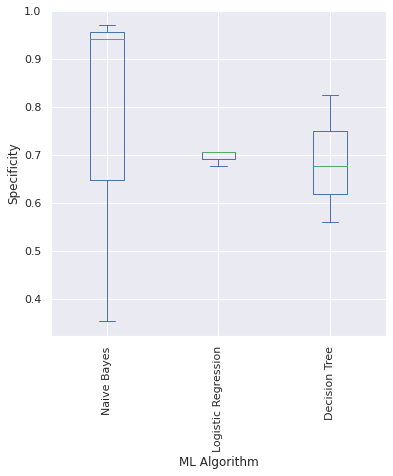

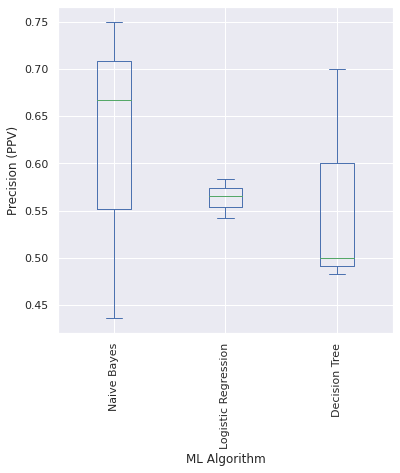

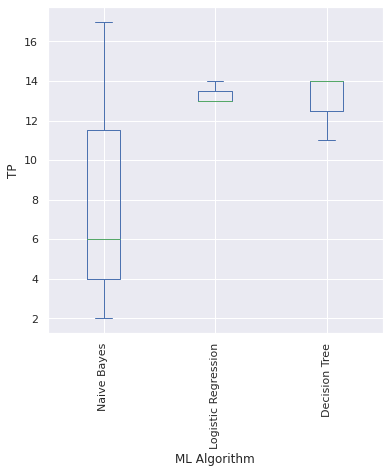

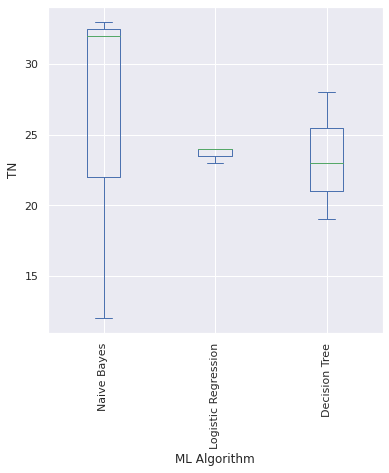

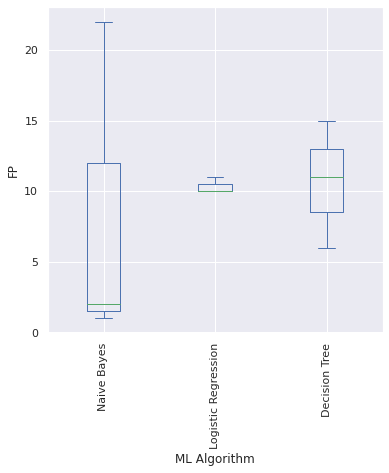

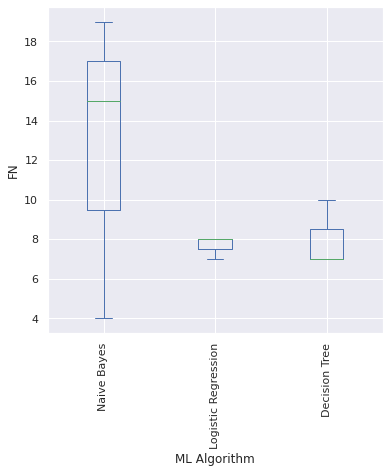

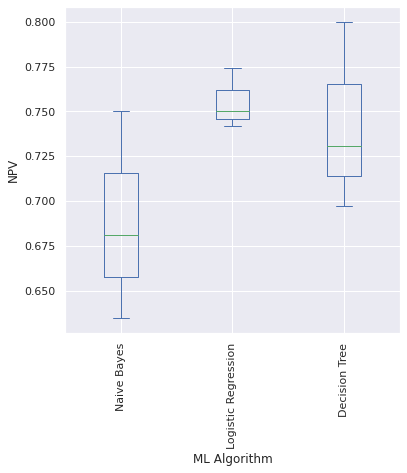

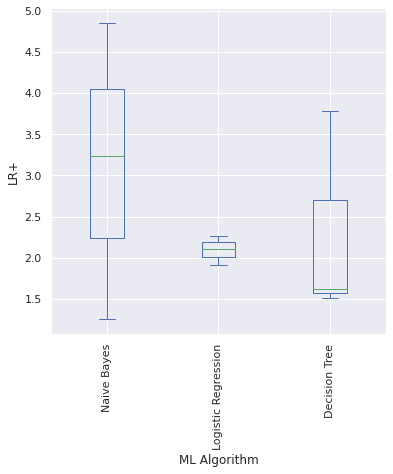

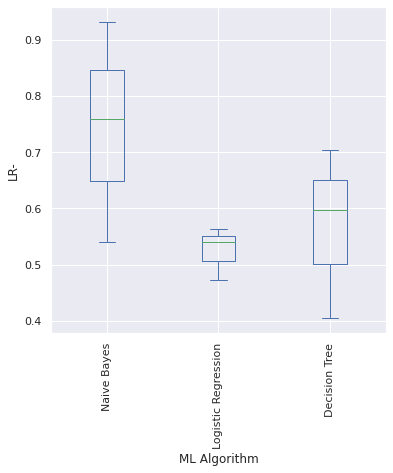

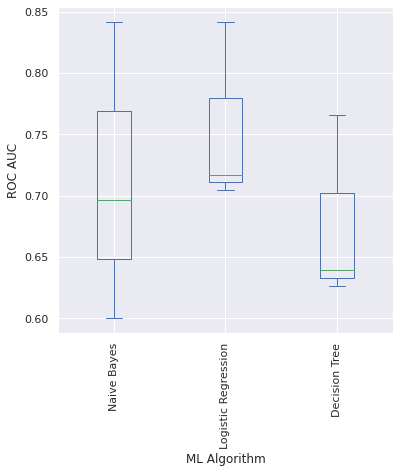

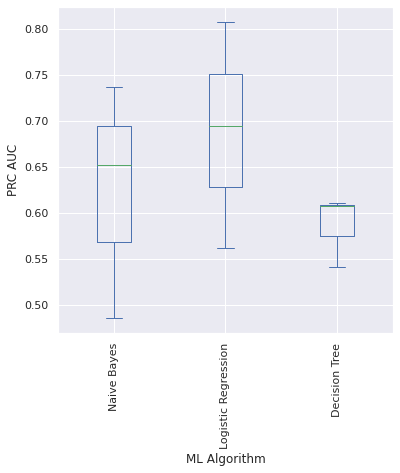

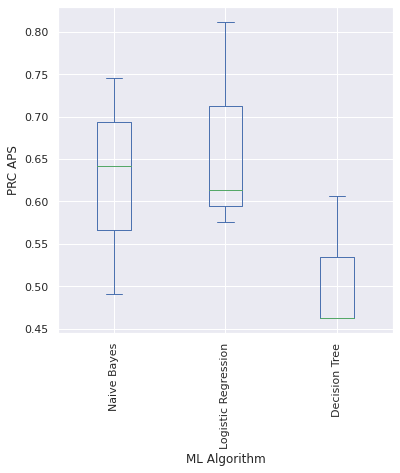

INFO:root:Running Non-Parametric Statistical Significance Analysis...
INFO:root:Preparing for Model Feature Importance Plotting...
INFO:root:Generating Feature Importance Boxplot and Histograms...


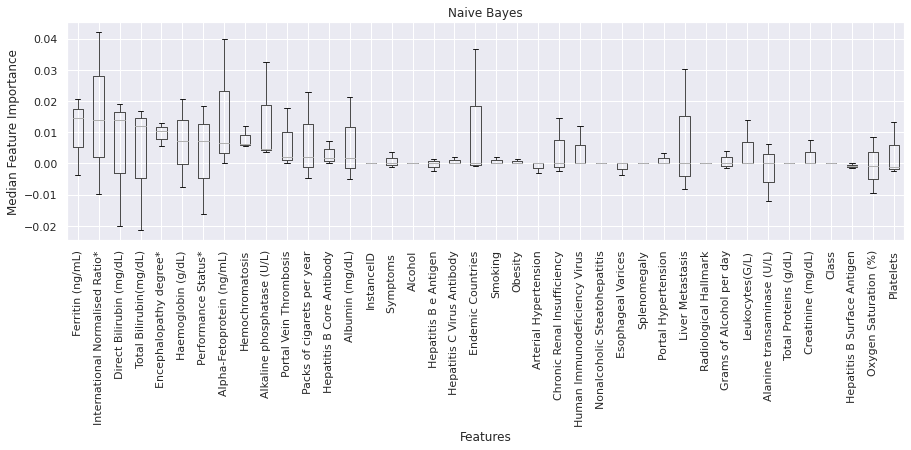

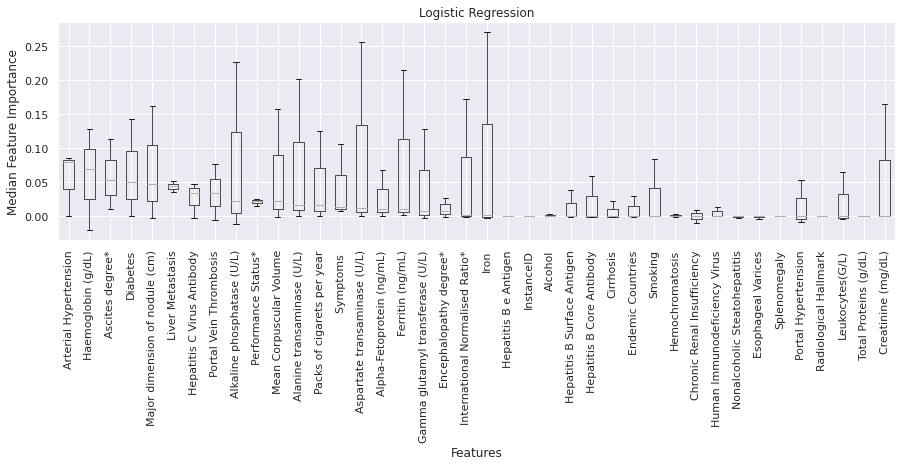

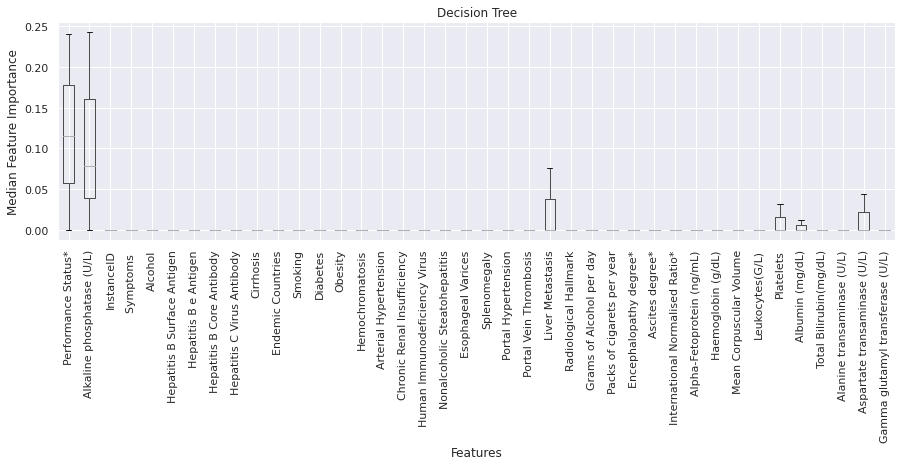

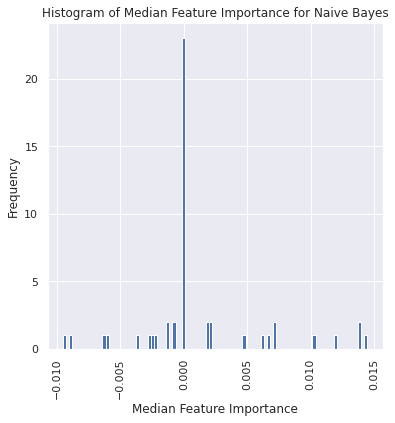

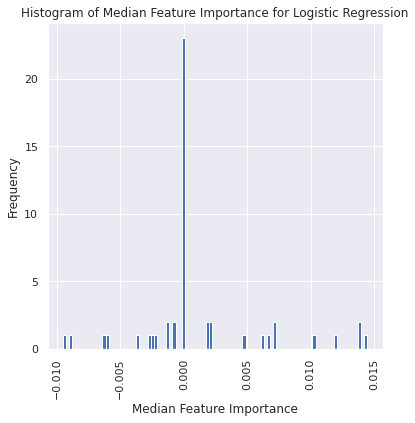

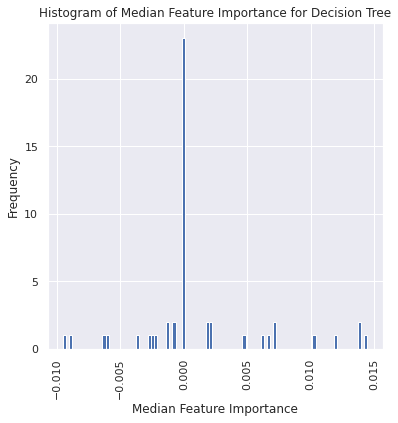

INFO:root:Generating Composite Feature Importance Plots...


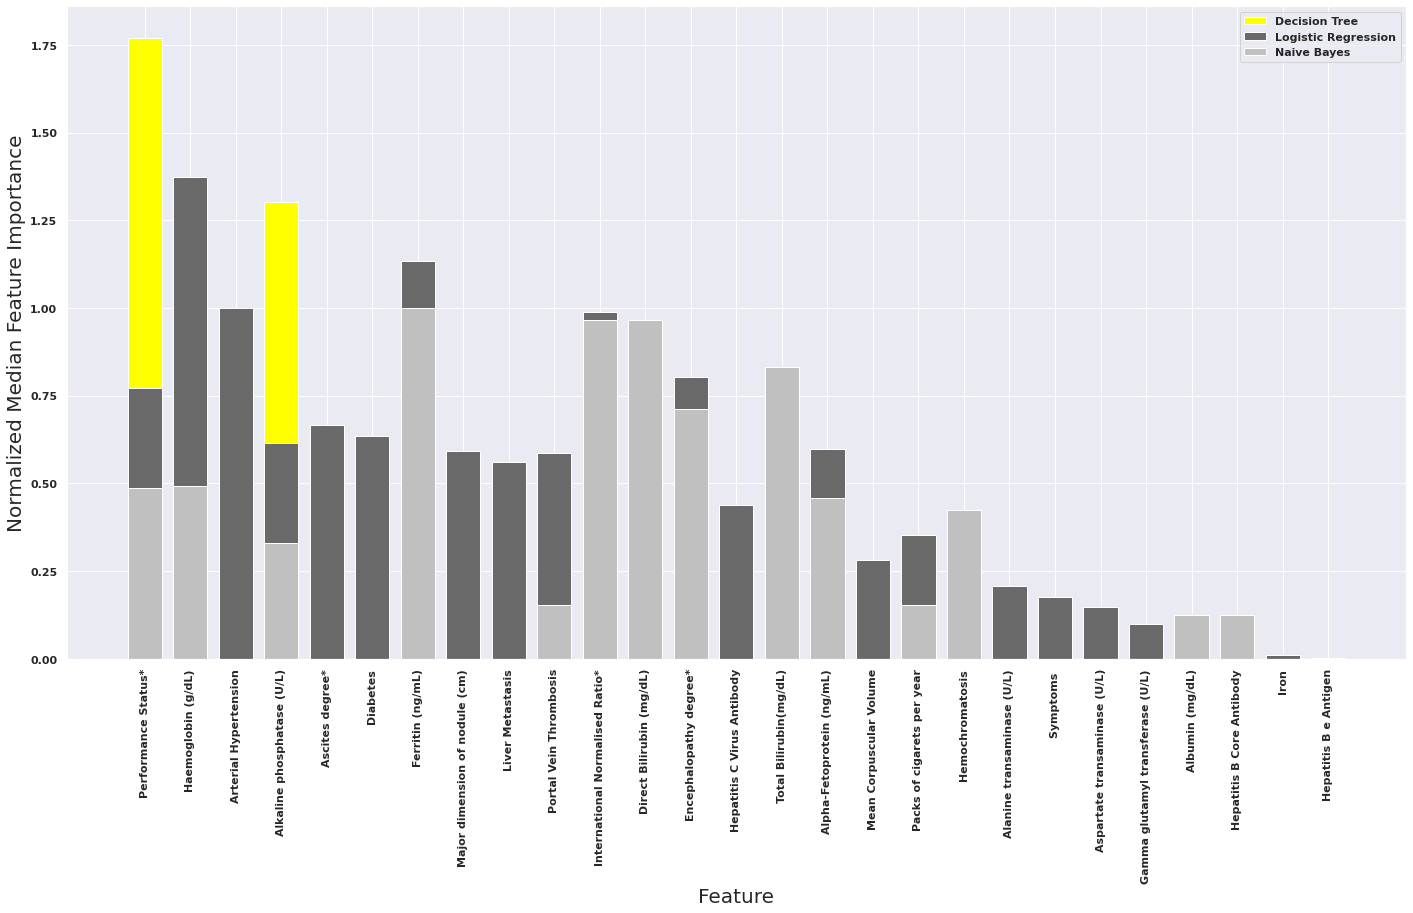

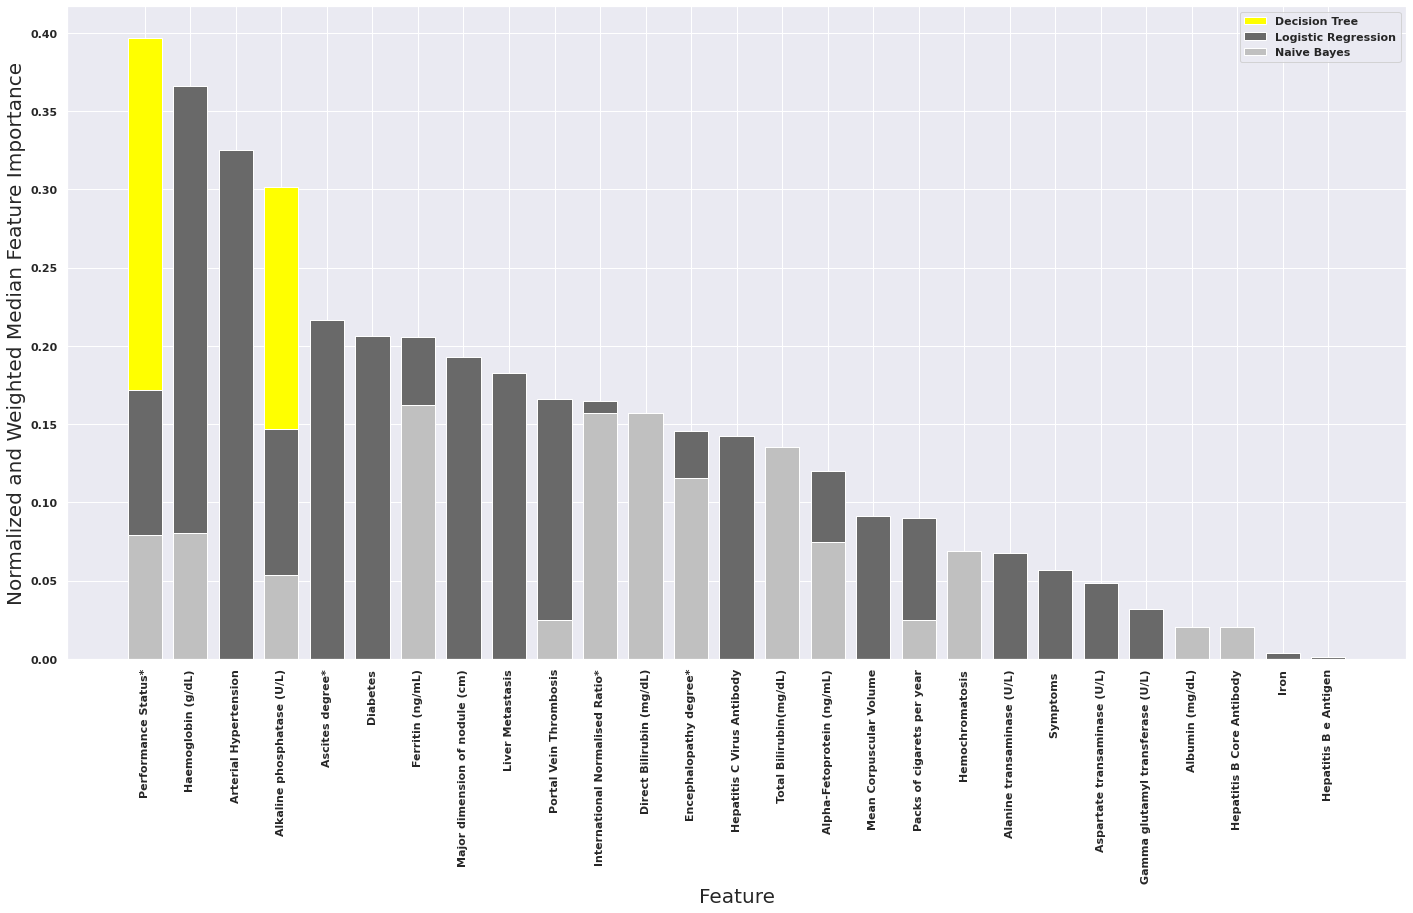

INFO:root:hcc-data_example_no_covariates phase 5 complete
INFO:root:Running Statistics Summary for demodata
INFO:root:Running stats on Naive Bayes


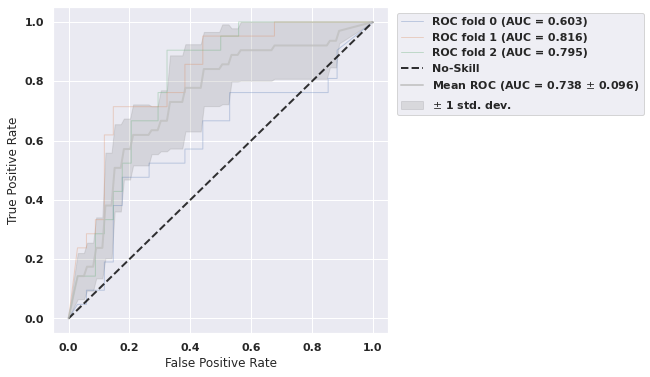

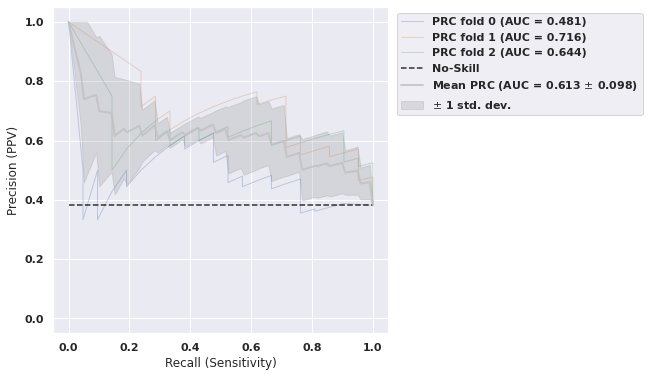

INFO:root:Running stats on Logistic Regression


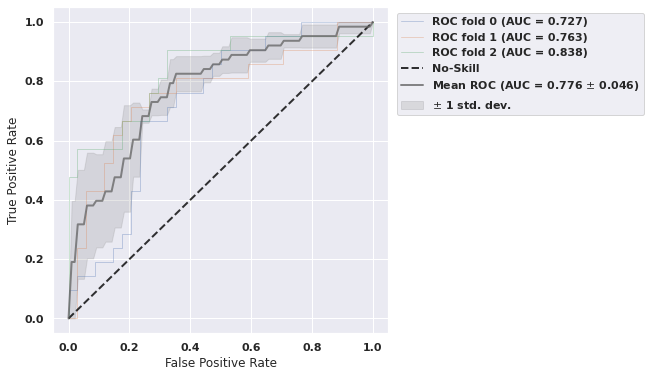

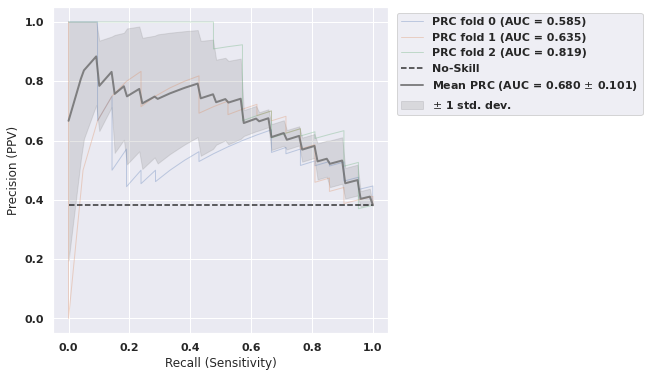

INFO:root:Running stats on Decision Tree


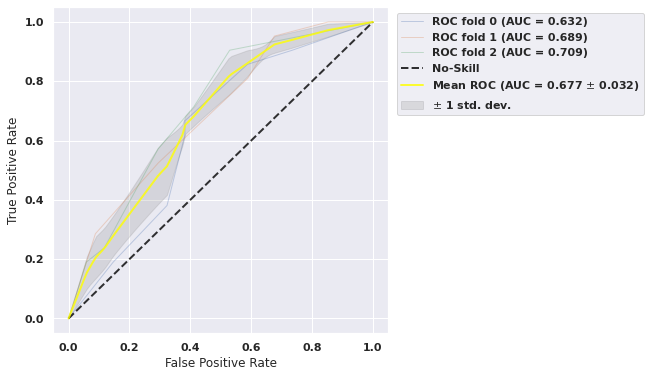

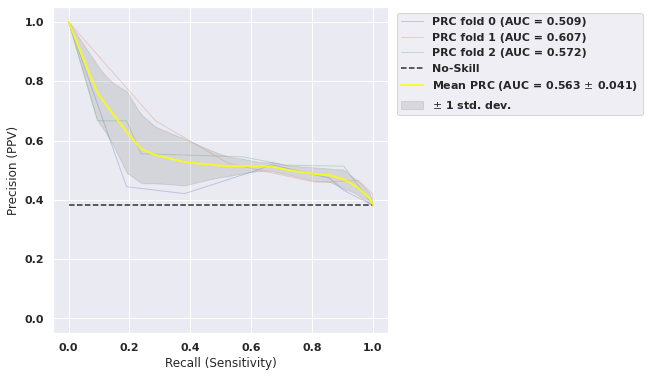

INFO:root:Generating ROC and PRC plots...


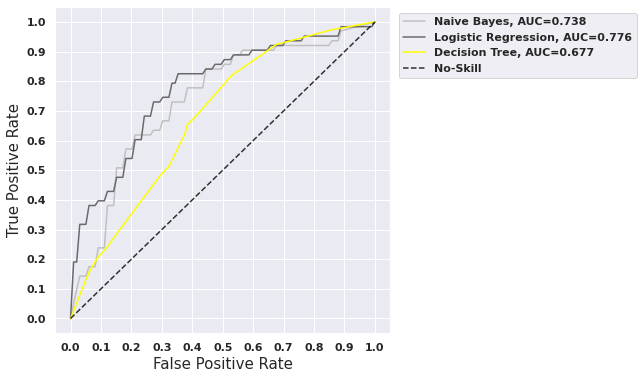

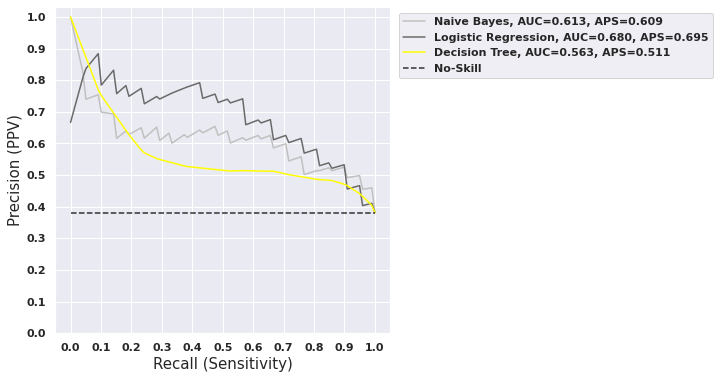

INFO:root:Saving Metric Summaries...
INFO:root:Generating Metric Boxplots...


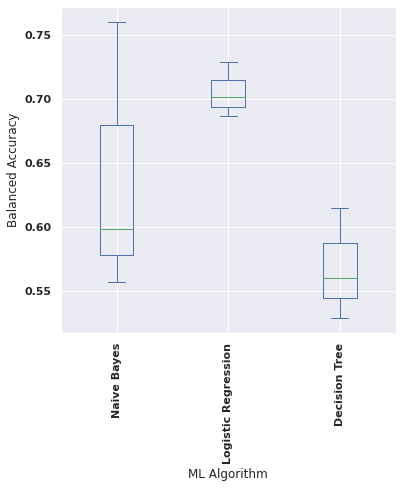

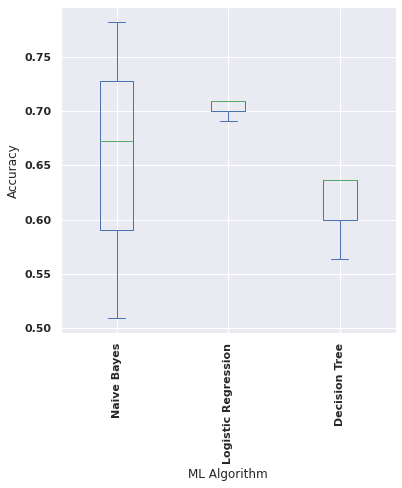

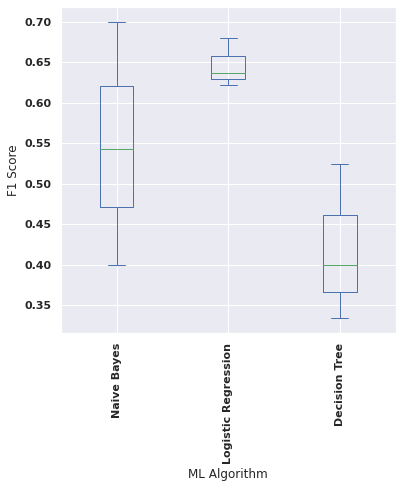

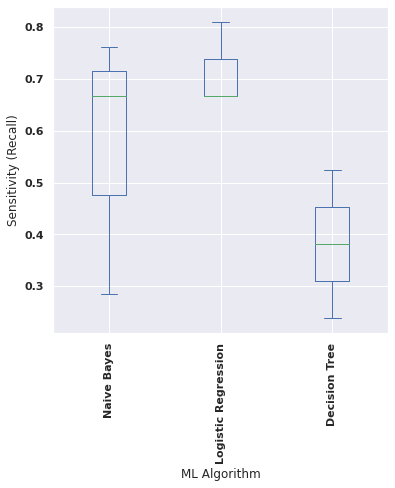

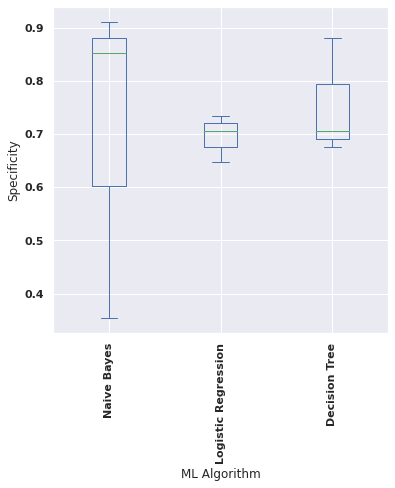

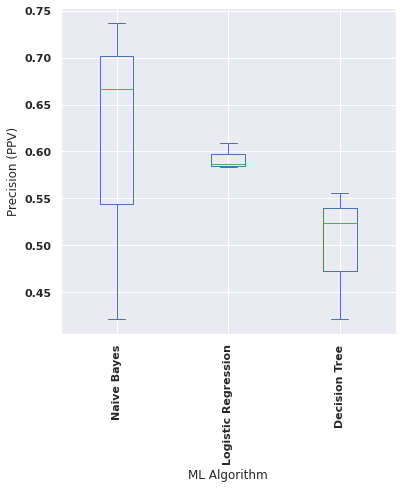

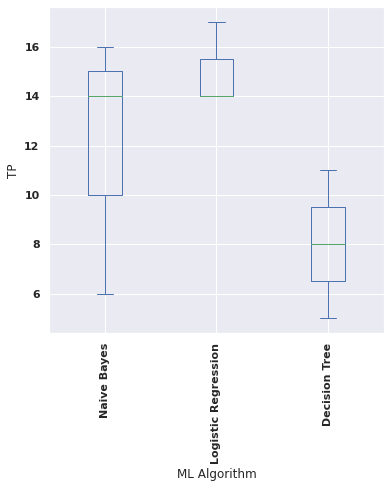

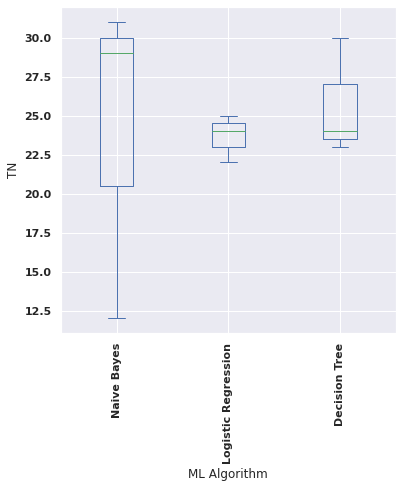

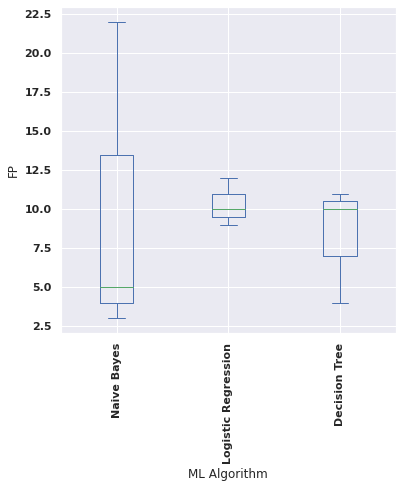

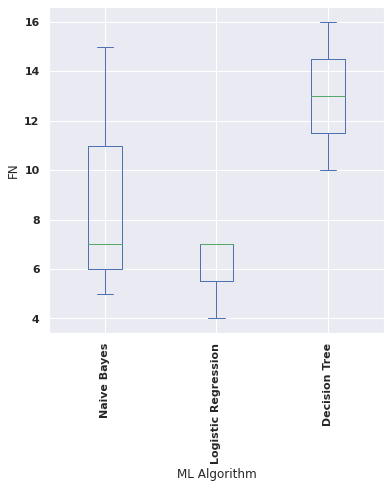

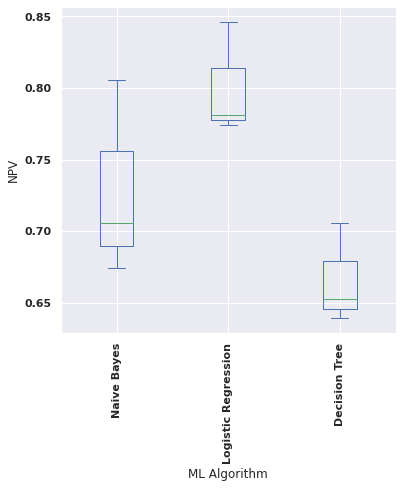

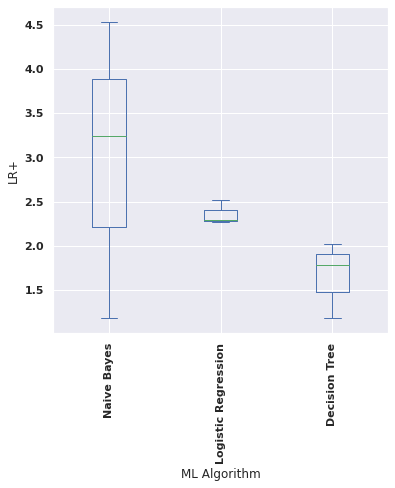

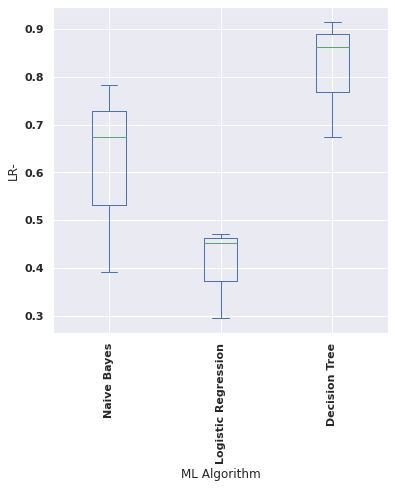

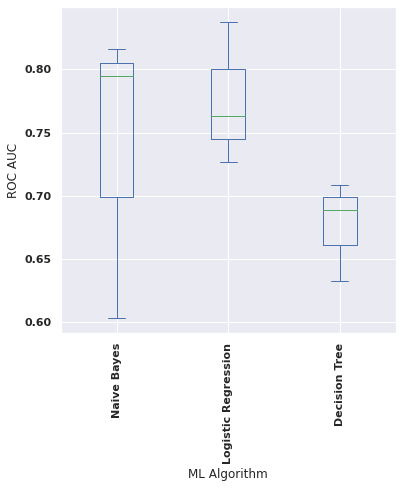

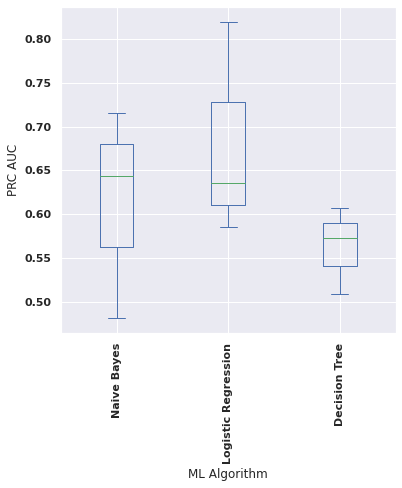

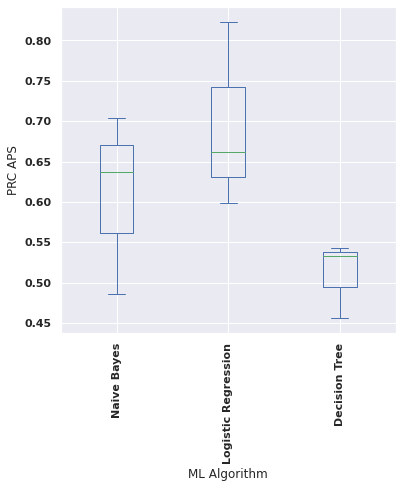

INFO:root:Running Non-Parametric Statistical Significance Analysis...
INFO:root:Preparing for Model Feature Importance Plotting...
INFO:root:Generating Feature Importance Boxplot and Histograms...


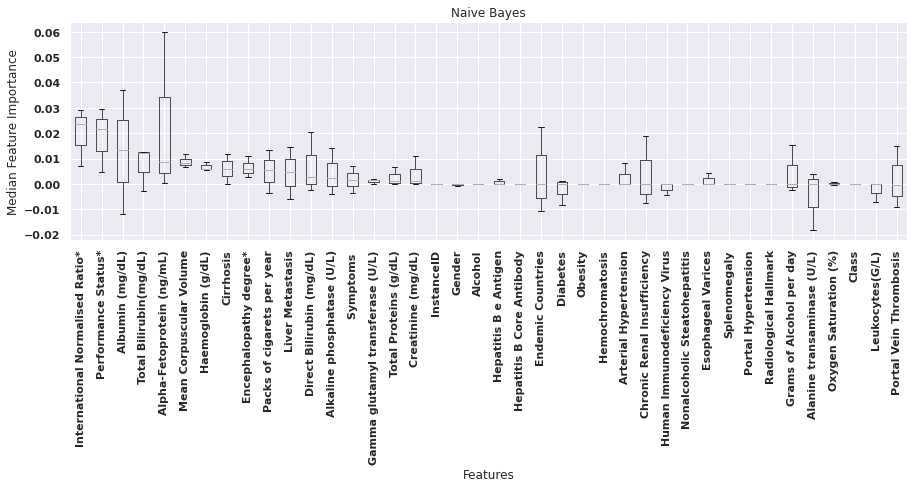

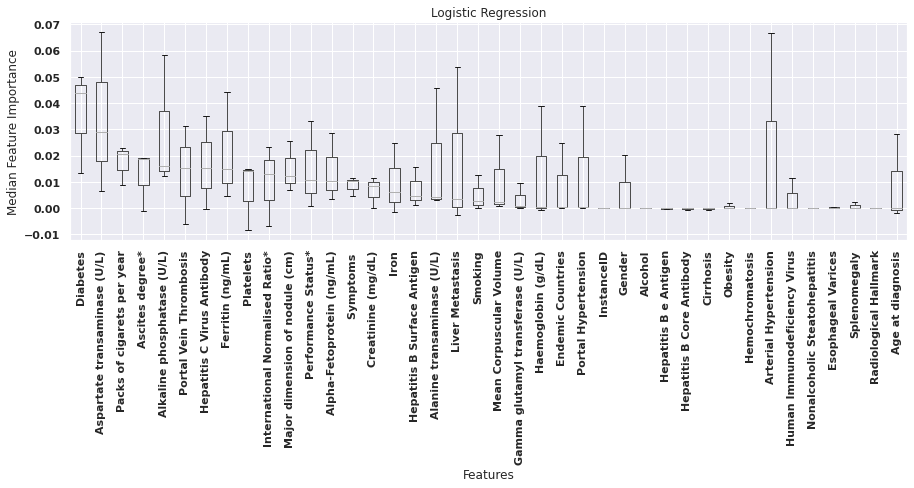

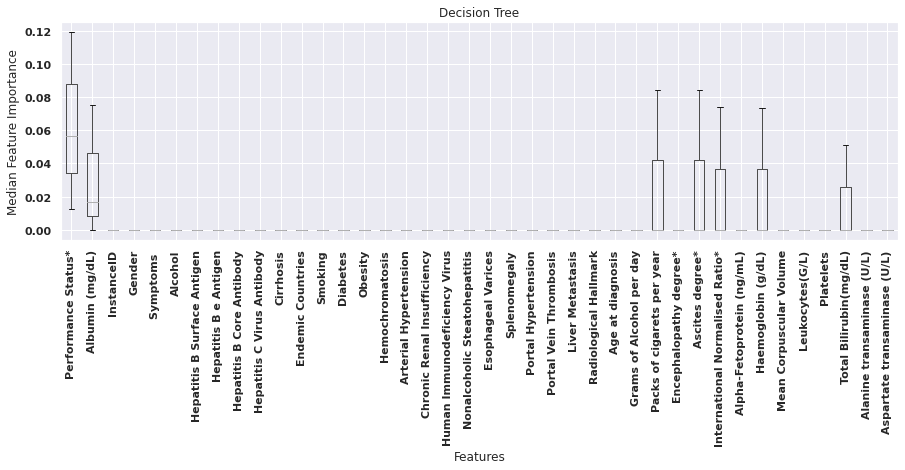

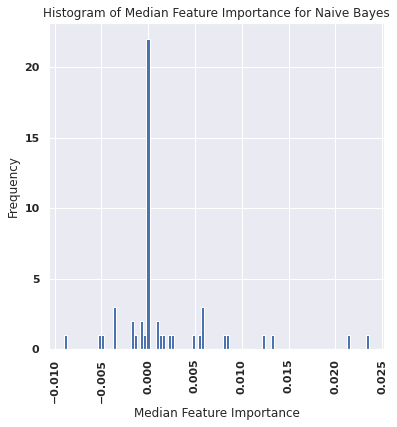

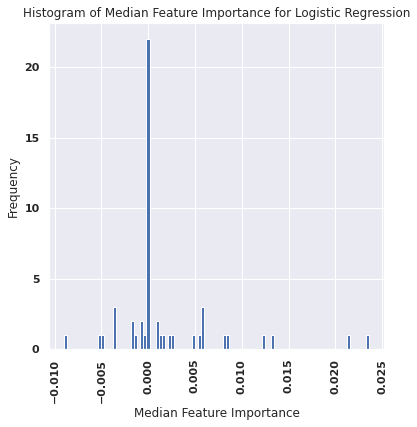

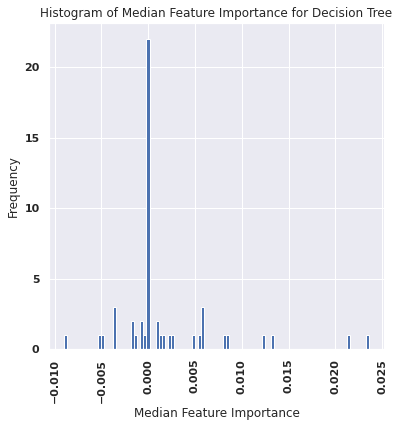

INFO:root:Generating Composite Feature Importance Plots...


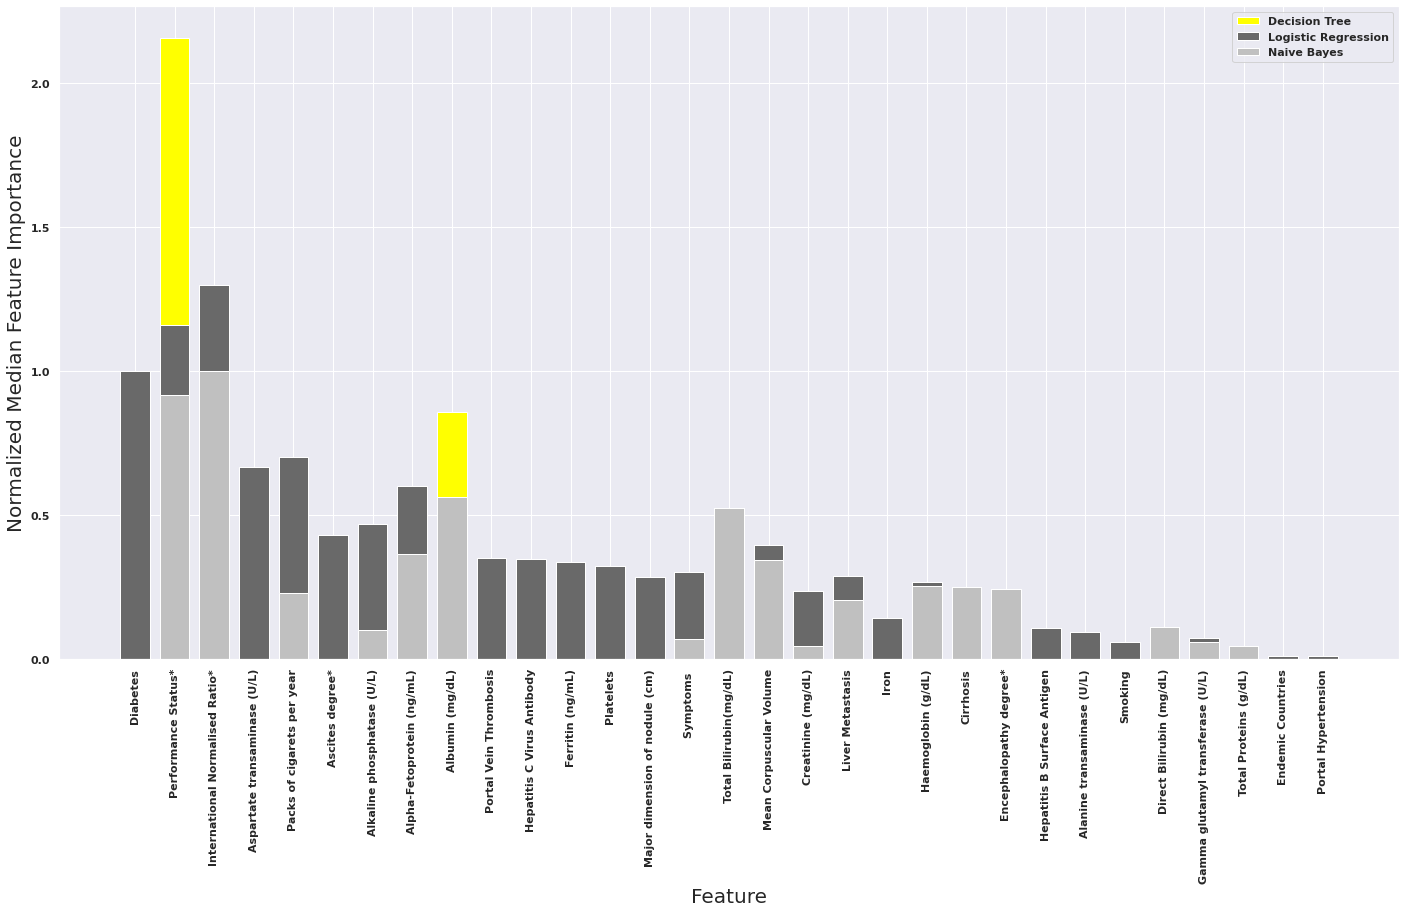

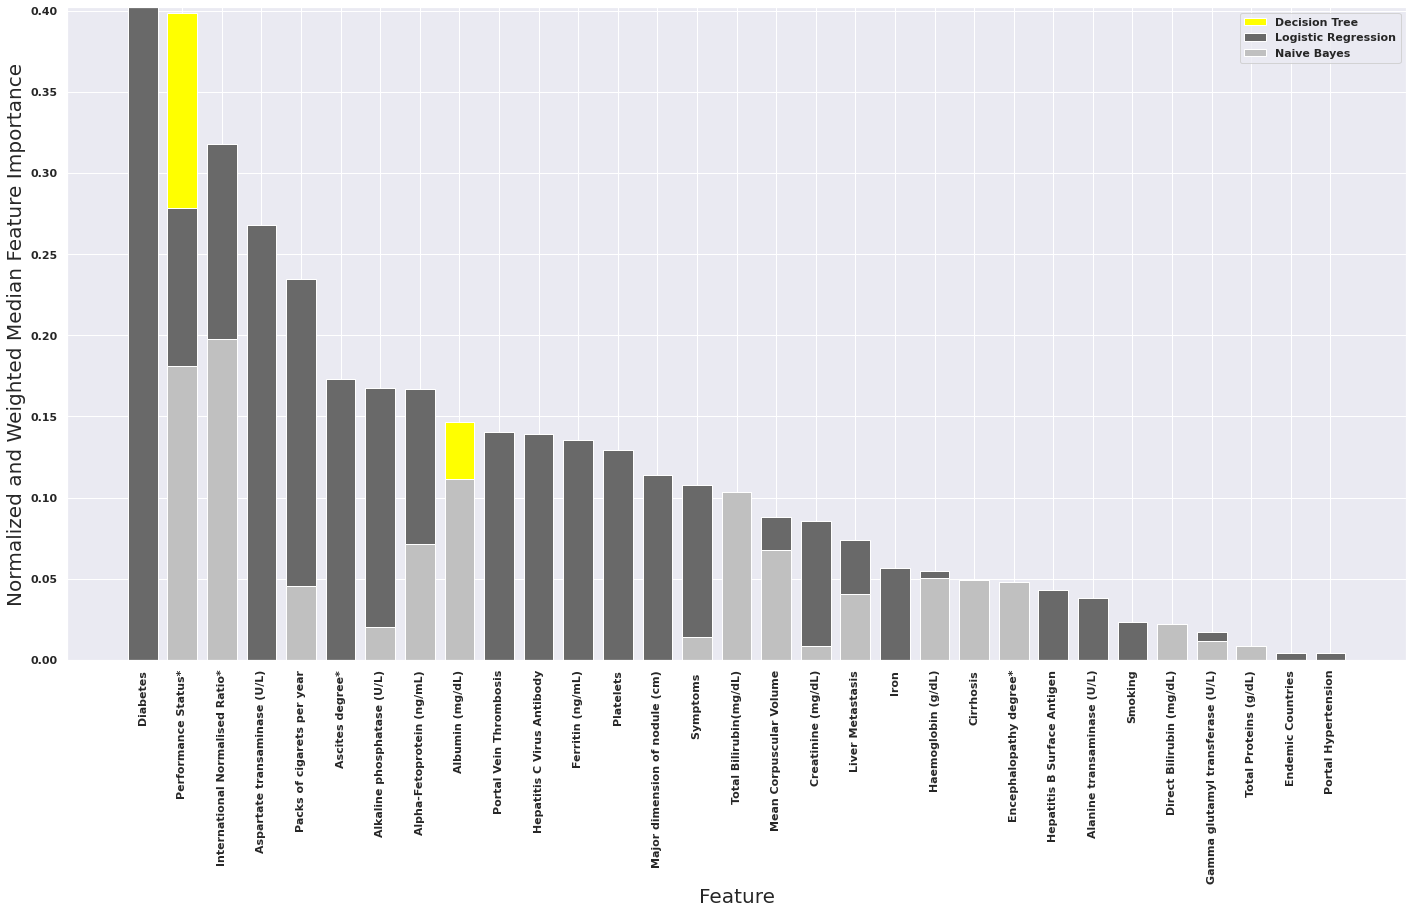

INFO:root:demodata phase 5 complete


In [ ]:
from streamline.runners.stats_runner import StatsRunner
stats = StatsRunner(output_path, experiment_name, 
                    algorithms=algorithms, exclude=exclude, 
                    class_label=class_label, instance_label=instance_label, 
                    scoring_metric=primary_metric,
                    top_features=top_model_features, sig_cutoff=sig_cutoff, 
                    metric_weight=metric_weight, scale_data=scale_data,
                    plot_roc=plot_ROC, plot_prc=plot_PRC, 
                    plot_fi_box=plot_FI_box, 
                    plot_metric_boxplots=plot_metric_boxplots, 
                    show_plots=True)
stats.run(run_parallel=False)

## Phase 7: Dataset Comparison (Optional: Use only if > 1 dataset was analyzed)

In [ ]:
#@title Function to check length for more than one dataset case
def len_datasets(output_path, experiment_name):
    datasets = os.listdir(output_path + '/' + experiment_name)
    remove_list = ['metadata.pickle', 'metadata.csv', 'algInfo.pickle',
                   'jobsCompleted', 'logs', 'jobs', 'DatasetComparisons', 'UsefulNotebooks',
                   experiment_name + '_ML_Pipeline_Report.pdf']
    for text in remove_list:
        if text in datasets:
            datasets.remove(text)
    return len(datasets)

INFO:root:Running Statistical Significance Comparisons Between Multiple Datasets...
INFO:root:Generate Boxplots Comparing Dataset Performance...


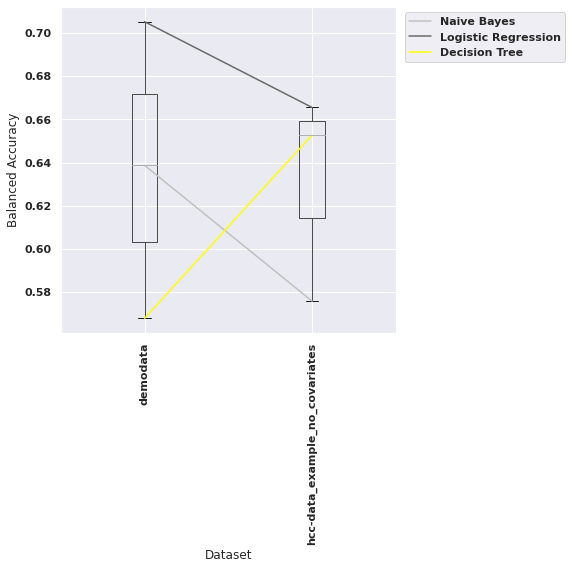

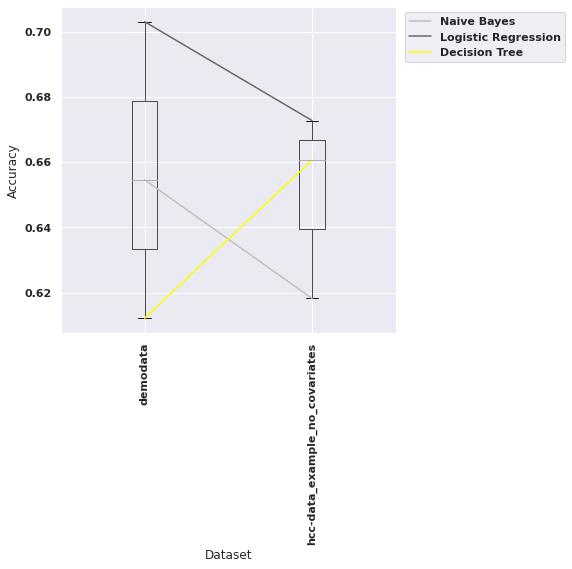

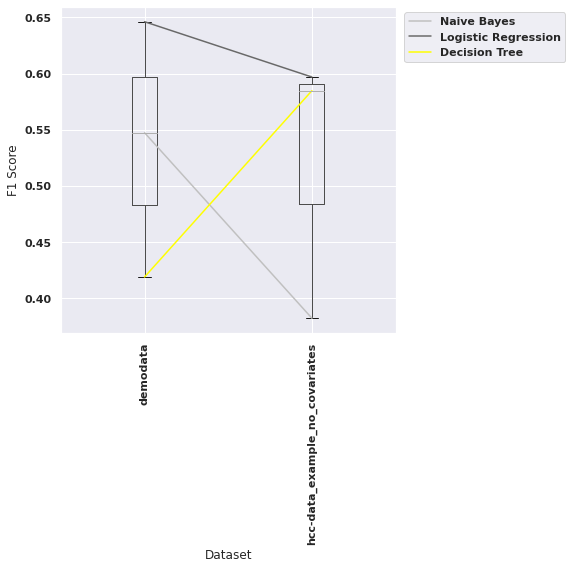

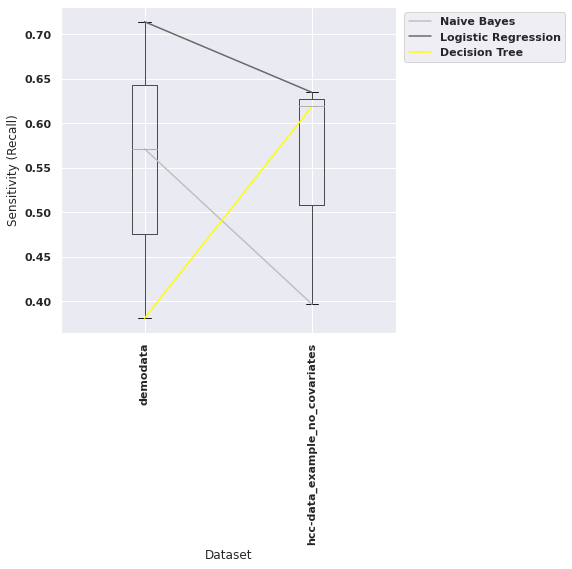

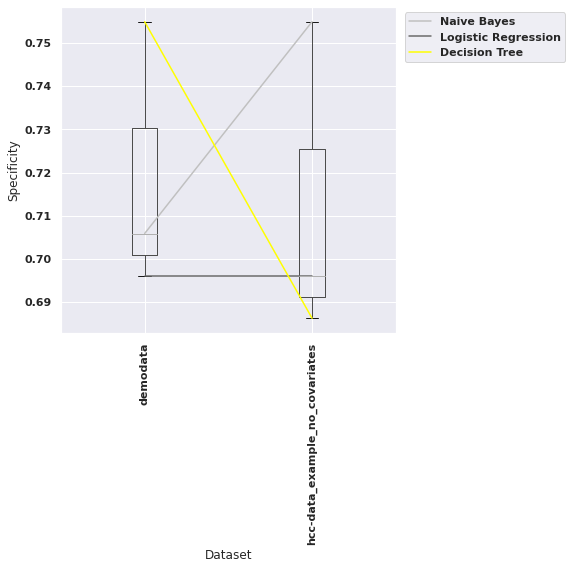

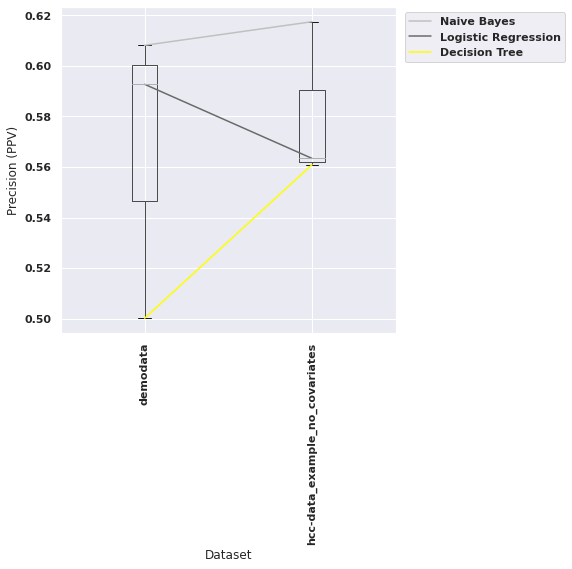

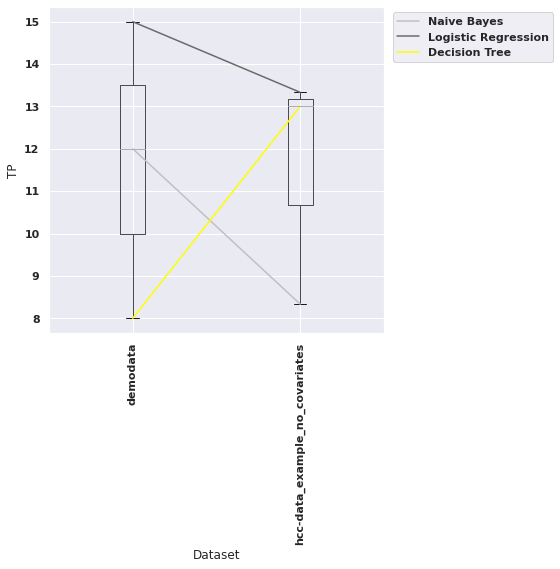

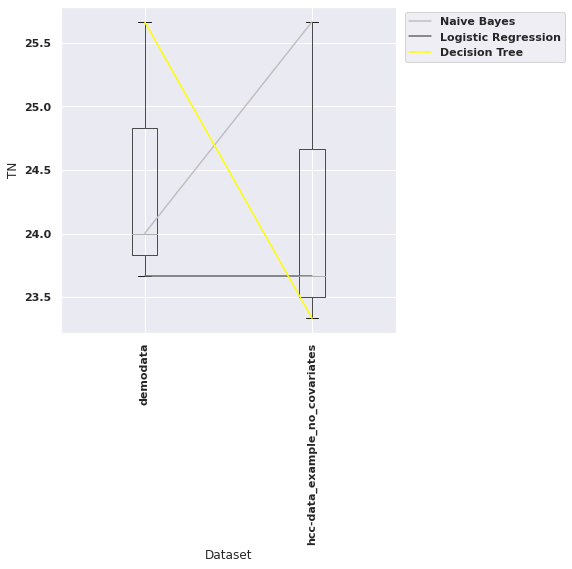

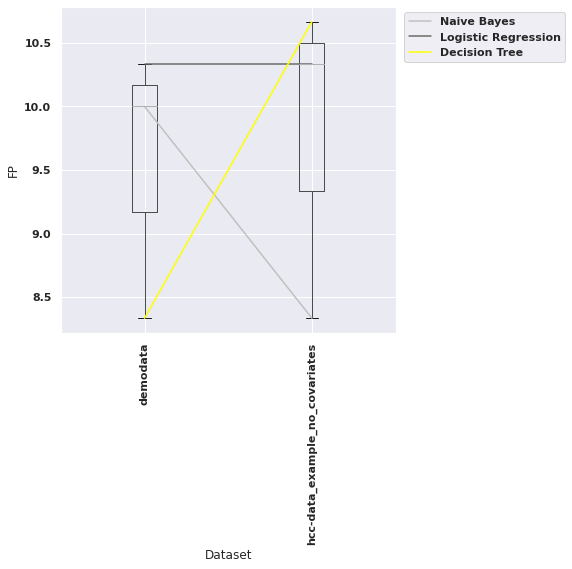

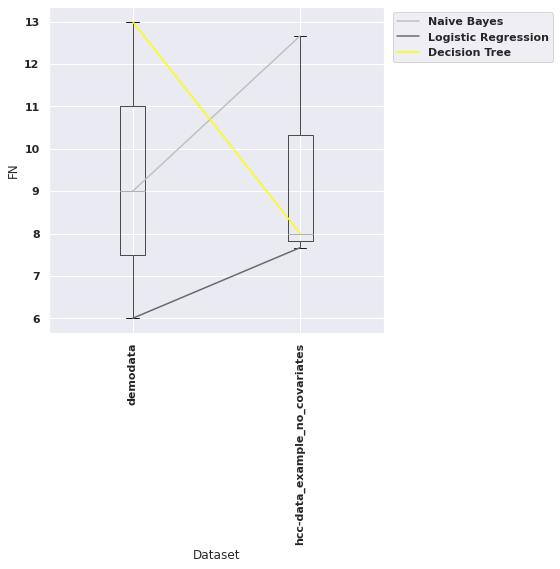

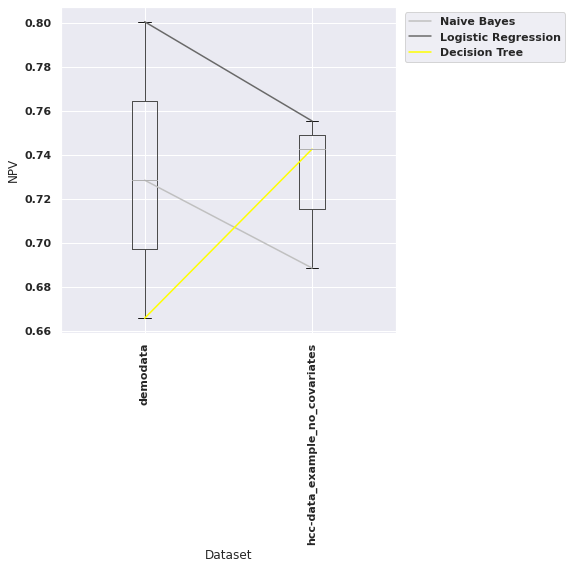

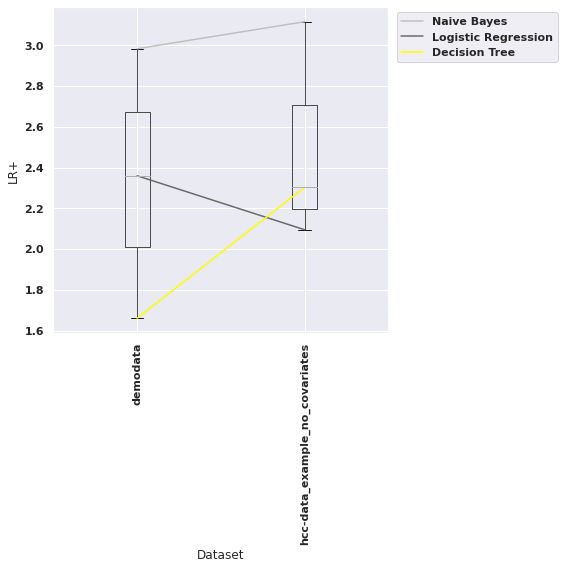

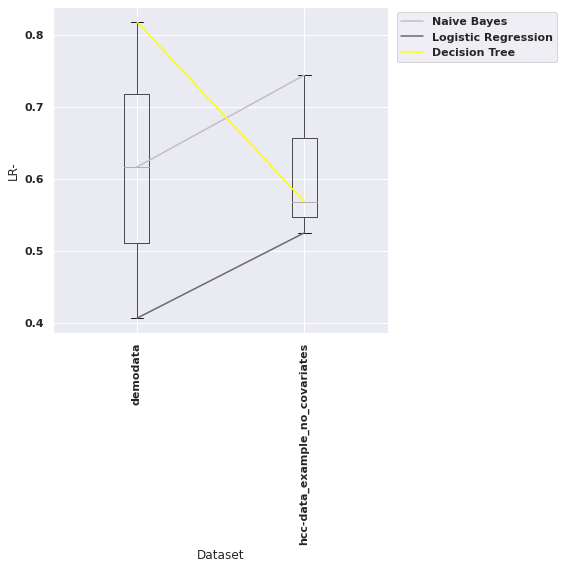

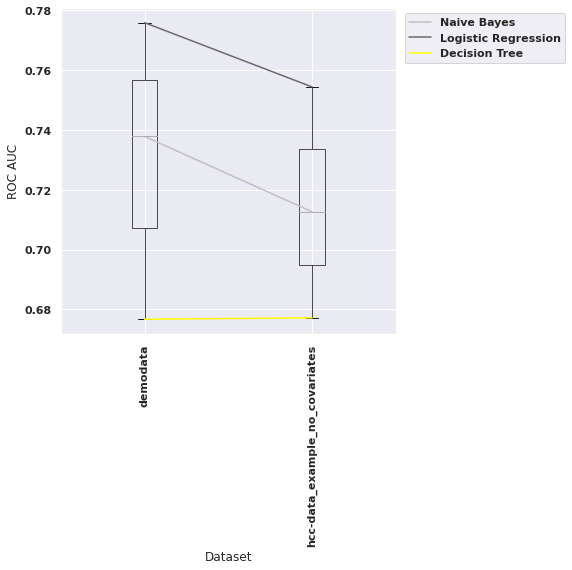

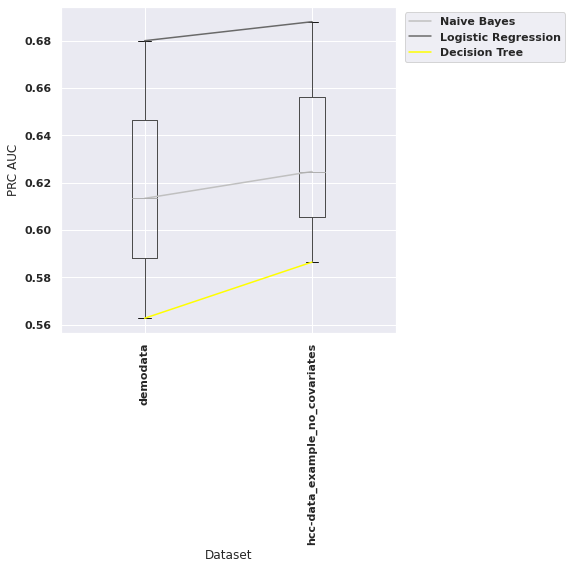

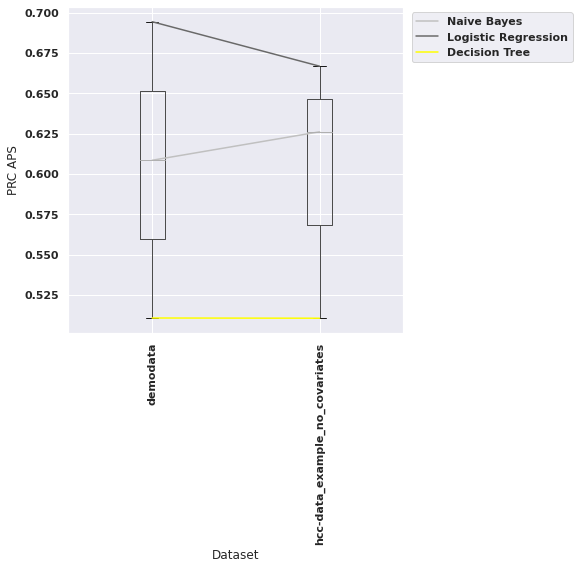

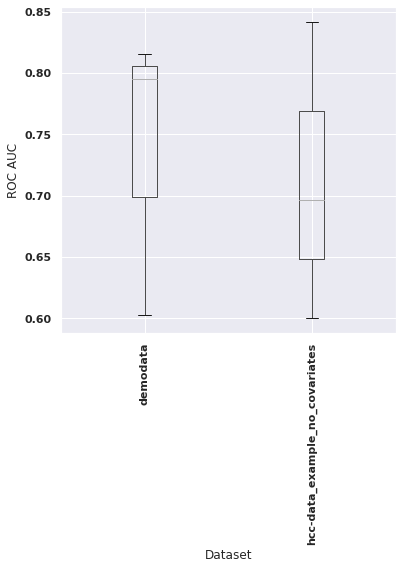

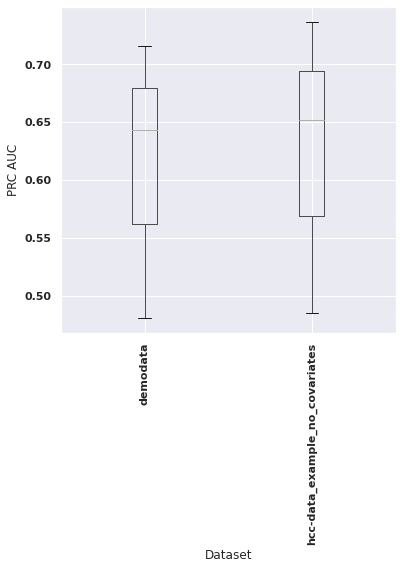

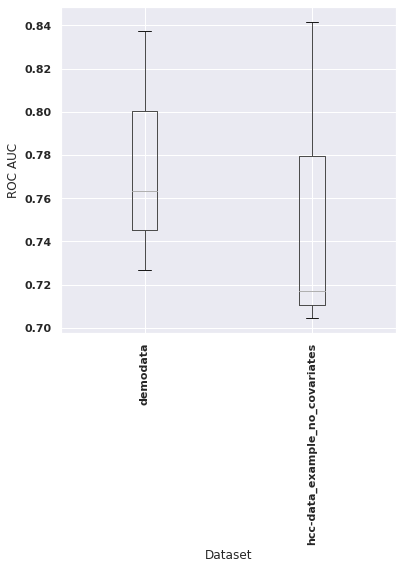

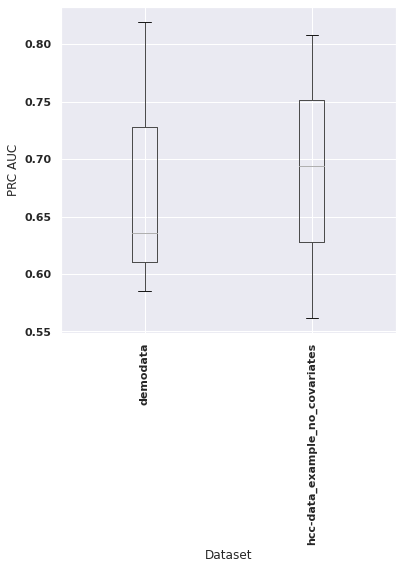

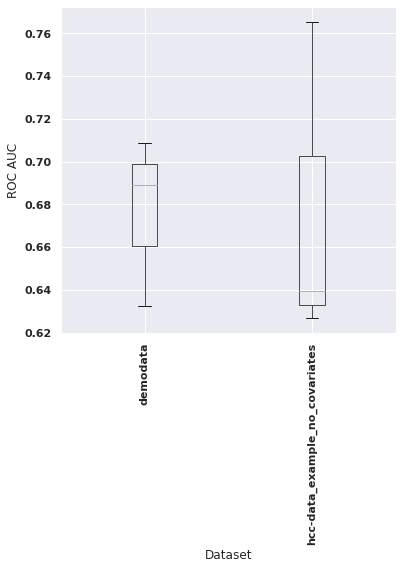

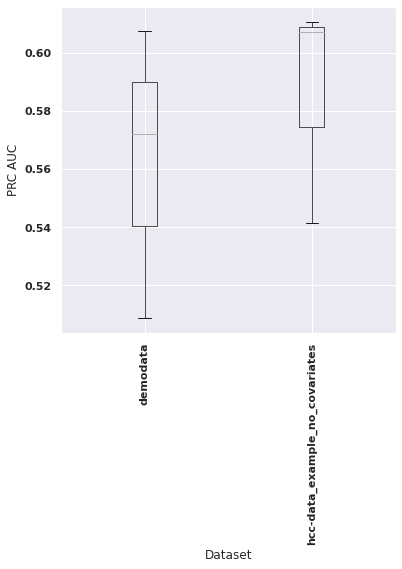

INFO:root:Phase 7 complete


In [ ]:
from streamline.runners.compare_runner import CompareRunner
if len_datasets(output_path, experiment_name) > 1:
    cmp = CompareRunner(output_path, experiment_name, algorithms=algorithms,
                        exclude=exclude, sig_cutoff=sig_cutoff,
                        class_label=class_label, instance_label=instance_label,
                        show_plots=True)
    cmp.run(run_parallel=False)

## Phase 8: PDF Training Report Generator (Optional)
Download a PDF report of the analysis

In [ ]:
from streamline.runners.report_runner import ReportRunner
rep = ReportRunner(output_path, experiment_name, 
                   algorithms=algorithms, exclude=exclude)
rep.run(run_parallel=False)
from google.colab import files
files.download(output_path + '/' + experiment_name + '/' + experiment_name + '_ML_Pipeline_Report.pdf') 

INFO:root:Starting Report
INFO:root:Publishing Univariate Analysis
INFO:root:Publishing Model Prediction Summary
INFO:root:Publishing Average Model Prediction Statistics
INFO:root:Publishing Median Model Prediction Statistics
INFO:root:Publishing Feature Importance Summaries
INFO:root:Publishing Dataset Comparison Boxplots
INFO:root:Publishing Statistical Analysis
INFO:root:Publishing Runtime Summary
INFO:root:Phase 8 complete


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Phase 9: Apply Models to Replication Data (Optional)

In [ ]:
applyToReplication = True # (bool, True or False) Leave false unless you have a replication dataset handy to further evaluate/compare all models in uniform manner

In [ ]:
wd_path = '.'
rep_data_path = wd_path + '/DemoRepData'
dataset_for_rep = wd_path + '/DemoData/demodata.csv'
dataset_name = dataset_for_rep.split('/')[-1].split('.')[0]

Uncomment for custom replication dataset

In [ ]:
# !mkdir -p mycrepfolder
# %cd mycrepfolder
# from google.colab import files
# uploaded = files.upload()
# %cd ..
# rep_data_path = mycrepfolder
# dataset_for_rep = './mycustomfolder' + input('Train Dataset CSV for Replication Testing')

In [ ]:
if applyToReplication:
    from streamline.runners.replicate_runner import ReplicationRunner
    repl = ReplicationRunner(rep_data_path, dataset_for_rep, output_path, 
                             experiment_name, load_algo=True,
                             export_feature_correlations=True, 
                             plot_roc=True, plot_prc=True, plot_metric_boxplots=True)
    repl.run(run_parallel=False)

INFO:root:Loading Dataset: hcc-data_example_rep
INFO:root:Loading Dataset: demodata
INFO:root:Data Counts: ----------------
INFO:root:Instance Count = 165
INFO:root:Feature Count = 49
INFO:root:    Categorical  = 27
INFO:root:    Quantitative = 22
INFO:root:Missing Count = 826
INFO:root:    Missing Percent = 0.10216450216450217
INFO:root:Class Counts: ----------------
INFO:root:Class Count Information0    102
1     63
Name: Class, dtype: int64
INFO:root:Running stats on Decision Tree
INFO:root:Running stats on Logistic Regression
INFO:root:Running stats on Naive Bayes


hcc-data_example_rep phase 9 complete


## Phase 10: PDF Apply Report Generator (Optional)

In [ ]:
if applyToReplication:
    from streamline.runners.report_runner import ReportRunner
    rep = ReportRunner(output_path=output_path, experiment_name=experiment_name,
                       algorithms=algorithms, exclude=exclude, training=False, 
                       rep_data_path=rep_data_path, 
                       dataset_for_rep=dataset_for_rep)
    rep.run(run_parallel=False)

INFO:root:Starting Report
INFO:root:Publishing Model Prediction Summary
INFO:root:Publishing Average Model Prediction Statistics
INFO:root:Publishing Median Model Prediction Statistics
INFO:root:Phase 10 complete


In [ ]:
from google.colab import files
pdf_files = []
for dirpath, dirnames, filenames in os.walk(output_path + '/' + experiment_name 
                                            + '/' + dataset_name + '/applymodel/'):
    for filename in [f for f in filenames if f.endswith(".pdf")]:
        pdf_files.append(os.path.join(dirpath, filename))
for file_path in pdf_files:
    files.download(file_path) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Phase 11: File Cleanup (Optional)

In [ ]:
del_time = True  # (bool, True or False) Delete individual run-time files (but save summary)
del_old_cv = True # (bool, True or False) Delete any of the older versions of CV training and testing datasets not overwritten (preserves final training and testing datasets)

In [ ]:
from streamline.runners.clean_runner import CleanRunner
clean = CleanRunner(output_path, experiment_name, del_time=del_time, del_old_cv=del_old_cv)
# run_parallel is not used in clean
clean.run()

# Zip the experiment folder and download.

In [ ]:
experiment_folder = output_path + '/' + experiment_name
!zip -r -q /content/{experiment_name}.zip {experiment_folder}
from google.colab import files
files.download('/content/' + experiment_name + '.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>